<a href="https://colab.research.google.com/github/yudam-J/KDC-classification-with-BERT/blob/main/KDC_classification(KoBERT_%EC%B5%9C%EC%86%8C%EB%A0%88%EC%BD%94%EB%93%9C_25_2_13).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Functions & Module Import

In [ ]:
!pip uninstall torch torchvision -y
!pip install torch==2.1.0 torchvision==0.16.0 --no-cache-dir

Found existing installation: torch 2.5.1+cu124
Uninstalling torch-2.5.1+cu124:
  Successfully uninstalled torch-2.5.1+cu124
Found existing installation: torchvision 0.20.1+cu124
Uninstalling torchvision-0.20.1+cu124:
  Successfully uninstalled torchvision-0.20.1+cu124
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 670.2/670.2 MB 167.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6.9/6.9 MB 173.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 410.6/410.6 MB 192.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 14.1/14.1 MB 173.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [ ]:
import pandas as pd
import os
import sys
import urllib.request
import json
import re
import numpy as np
from google.colab import drive
from glob import glob

drive.mount('/content/drive/')
os.chdir('/content/drive/MyDrive/work_dir')

pd.set_option('display.float_format', '{:.0f}'.format)

Mounted at /content/drive/


In [ ]:
def get_book_descriptions(df, isbn_column, client_id, client_secret):
    """
    ÎÑ§Ïù¥Î≤Ñ Ï±Ö APIÎ•º ÌÜµÌï¥ ISBN Î≤àÌò∏Î•º Î∞îÌÉïÏúºÎ°ú Ï±Ö ÏÑ§Î™ÖÏùÑ Í∞ÄÏ†∏Ïò§Îäî Ìï®Ïàò.

    Parameters:
    - df (pd.DataFrame): ISBN Î≤àÌò∏Í∞Ä ÏûàÎäî Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    - isbn_column (str): ISBN Î≤àÌò∏Í∞Ä Ìè¨Ìï®Îêú Ïó¥Ïùò Ïù¥Î¶Ñ
    - client_id (str): ÎÑ§Ïù¥Î≤Ñ API ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏ ID
    - client_secret (str): ÎÑ§Ïù¥Î≤Ñ API ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏ ÏãúÌÅ¨Î¶ø

    Returns:
    - pd.DataFrame: description Ïó¥Ïù¥ Ï∂îÍ∞ÄÎêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    """
    descriptions = []

    for isbn in df[isbn_column]:
        query = urllib.parse.quote(isbn)

        # ÎÑ§Ïù¥Î≤Ñ API URL
        url = f"https://openapi.naver.com/v1/search/book_adv?d_isbn={query}&display=1&start=1&sort=sim"

        # ÏöîÏ≤≠ Ìó§Îçî ÏÑ§Ï†ï
        request = urllib.request.Request(url)
        request.add_header("X-Naver-Client-Id", client_id)
        request.add_header("X-Naver-Client-Secret", client_secret)

        try:
            # API ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
            response = urllib.request.urlopen(request)
            rescode = response.getcode()

            if rescode == 200:
                # ÏùëÎãµ Î≥∏Î¨∏ ÏùΩÍ∏∞
                response_body = response.read()
                items = json.loads(response_body.decode('utf-8')).get("items", [])

                # HTML ÌÉúÍ∑∏ Ï†úÍ±∞Ïö© Ï†ïÍ∑ú ÌëúÌòÑÏãù
                remove_tag = re.compile('<.*?>')

                # Ï±ÖÏùò description Í∞ÄÏ†∏Ïò§Í∏∞ (Ï≤´ Î≤àÏß∏ Í≤ÄÏÉâ Í≤∞Í≥º)
                description = re.sub(remove_tag, '', items[0]['description']) if items else "No description available"
                descriptions.append(description)
            else:
                print(f"Error Code: {rescode}")
                descriptions.append("Error in fetching description")

        except urllib.error.HTTPError as e:
            print(f"HTTP Error: {e.code}")
            descriptions.append("HTTP Error")
        except urllib.error.URLError as e:
            print(f"URL Error: {e.reason}")
            descriptions.append("URL Error")
        except Exception as e:
            print(f"General Error: {str(e)}")
            descriptions.append("General Error")

    # DataFrameÏóê descriptions Ïó¥ Ï∂îÍ∞Ä
    df['description'] = descriptions

    return df

#Data Preprocessing

## (1) Data Load and Combine

In [ ]:
"""
ÏßÄÏ†ïÎêú Í≤ΩÎ°úÏùò ÌååÏùºÏùÑ Î∂àÎü¨ÏôÄ ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ëÌï©Ìï©ÎãàÎã§.
"""
csv_files = glob(os.path.join('/content/drive/MyDrive/work_dir', "NL_BO_SPECIES_MASTER_NEW*.csv"))

# Í∞Å ÌååÏùºÏùÑ ÏùΩÍ≥† Î¶¨Ïä§Ìä∏Ïóê Ï∂îÍ∞ÄÌïòÏó¨ Î≥ëÌï©
dataframes = []
for file in csv_files:
    df = pd.read_csv(file)
    dataframes.append(df)

# Î™®Îì† Îç∞Ïù¥ÌÑ∞Î•º ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Í≤∞Ìï©
df_2 = pd.concat(dataframes, ignore_index=True)

<ipython-input-4-15d402cc761f>:9: DtypeWarning: Columns (6,11,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-4-15d402cc761f>:9: DtypeWarning: Columns (7,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-4-15d402cc761f>:9: DtypeWarning: Columns (6,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-4-15d402cc761f>:9: DtypeWarning: Columns (11,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-4-15d402cc761f>:9: DtypeWarning: Columns (1,6,7,9,10,11,12,13,14,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-4-15d402cc761f>:9: DtypeWarning: Columns (1,7,10,11,12,13,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read

In [ ]:
df_2.columns

Index(['SEQ_NO', 'ISBN_THIRTEEN_NO', 'VLM_NM', 'TITLE_NM', 'AUTHR_NM',
       'PUBLISHER_NM', 'PBLICTE_DE', 'ADTION_SMBL_NM', 'PRC_VALUE',
       'IMAGE_URL', 'BOOK_INTRCN_CN', 'KDC_NM', 'TITLE_SBST_NM',
       'AUTHR_SBST_NM', 'TWO_PBLICTE_DE', 'INTNT_BOOKST_BOOK_EXST_AT',
       'PORTAL_SITE_BOOK_EXST_AT', 'ISBN_NO'],
      dtype='object')

In [ ]:
df_2 = df_2[["TITLE_NM", "ISBN_THIRTEEN_NO", "BOOK_INTRCN_CN", "KDC_NM"]]

In [ ]:
df_2 = df_2.dropna(subset=['KDC_NM'])
nan_count_per_column = df_2.isna().sum()
print(nan_count_per_column)

TITLE_NM                  0
ISBN_THIRTEEN_NO          0
BOOK_INTRCN_CN      1392396
KDC_NM                    0
dtype: int64


In [ ]:
df_2 = df_2.dropna(subset=['BOOK_INTRCN_CN'])
nan_count_per_column = df_2.isna().sum()
print(nan_count_per_column)

TITLE_NM            0
ISBN_THIRTEEN_NO    0
BOOK_INTRCN_CN      0
KDC_NM              0
dtype: int64


In [ ]:
df_2.shape

(1050904, 4)

In [ ]:
df_2 = df_2.drop_duplicates(subset=['ISBN_THIRTEEN_NO'])
df_2.shape

(860476, 4)

In [ ]:
duplicate_counts = df_2['BOOK_INTRCN_CN'].value_counts()
# Ï§ëÎ≥µÎêú Í∞íÎßå ÌïÑÌÑ∞ÎßÅ (2Î≤à Ïù¥ÏÉÅ ÎÇòÌÉÄÎÇòÎäî Í∞í)
duplicates = duplicate_counts[duplicate_counts > 1]

print(duplicates)

BOOK_INTRCN_CN
[Ìï¥Ïô∏Ï£ºÎ¨∏ÏõêÏÑú] Í≥†Í∞ùÎãòÏùò ÏöîÏ≤≠ÏúºÎ°ú ÏàòÏûÖ Ï£ºÎ¨∏ÌïòÎäî ÎèÑÏÑúÏù¥ÎØÄÎ°ú, Ï£ºÎ¨∏Ï∑®ÏÜå Î∞è Î∞òÌíàÏù¥ Î∂àÍ∞ÄÌï©ÎãàÎã§. (Îã®, Ïû¨Í≥†Î∂ÄÏ°±Ïù∏ Í≤ΩÏö∞Îäî Í∞ÄÎä•)                                                                                                                 4966
Ïù¥ Ï±ÖÏùÄ Ìï¥Îãπ Î∂ÑÏïº Ï†ÑÍ≥µÏûêÎì§ÏùÑ ÏúÑÌïú ÍµêÏû¨ Í≤∏ Ï†ÑÎ¨∏ÏÑúÏù¥Îã§.                                                                                                                                                        255
‚ñ∂ Ïù¥ Ï±ÖÏùÄ ÏòÅÏñ¥Î°ú Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.                                                                                                                                                                  208
Ïñ¥Î¶∞Ïù¥Îì§ÏùÑ ÏúÑÌïú ÏùåÏïÖÍµêÏû¨Ïù¥Îã§. Ïñ¥Î¶∞Ïù¥Îì§Ïù¥ ÏâΩÍ≤å Îî∞ÎùºÌï† Ïàò ÏûàÎèÑÎ°ù Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÎã§.                                                                                                                                           199

In [ ]:
# ÏÇ≠Ï†úÌï† ÌñâÏùÑ Ï∞æÍ∏∞ ÏúÑÌïú Ï°∞Í±¥ ÏÑ§Ï†ï
df_2 = df_2[df_2['BOOK_INTRCN_CN'] != "[Ìï¥Ïô∏Ï£ºÎ¨∏ÏõêÏÑú] Í≥†Í∞ùÎãòÏùò ÏöîÏ≤≠ÏúºÎ°ú ÏàòÏûÖ Ï£ºÎ¨∏ÌïòÎäî ÎèÑÏÑúÏù¥ÎØÄÎ°ú, Ï£ºÎ¨∏Ï∑®ÏÜå Î∞è Î∞òÌíàÏù¥ Î∂àÍ∞ÄÌï©ÎãàÎã§. (Îã®, Ïû¨Í≥†Î∂ÄÏ°±Ïù∏ Í≤ΩÏö∞Îäî Í∞ÄÎä•)"]
df_2.shape

(855510, 4)

In [ ]:
df_2.rename(columns={"BOOK_INTRCN_CN": "description"}, inplace=True)

<ipython-input-13-64fb631bd86b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.rename(columns={"BOOK_INTRCN_CN": "description"}, inplace=True)


In [ ]:
df_2.columns

Index(['TITLE_NM', 'ISBN_THIRTEEN_NO', 'description', 'KDC_NM'], dtype='object')

In [ ]:
df.columns

Index(['SEQ_NO', 'ISBN_THIRTEEN_NO', 'VLM_NM', 'TITLE_NM', 'AUTHR_NM',
       'PUBLISHER_NM', 'PBLICTE_DE', 'ADTION_SMBL_NM', 'PRC_VALUE',
       'IMAGE_URL', 'BOOK_INTRCN_CN', 'KDC_NM', 'TITLE_SBST_NM',
       'AUTHR_SBST_NM', 'TWO_PBLICTE_DE', 'INTNT_BOOKST_BOOK_EXST_AT',
       'PORTAL_SITE_BOOK_EXST_AT', 'ISBN_NO'],
      dtype='object')

In [ ]:
!pip install transformers torch

In [ ]:
def load_and_combine_csv(directory_path):
    """
    ÏßÄÏ†ïÎêú Í≤ΩÎ°úÏùò chunk*.csv ÌååÏùºÏùÑ Î∂àÎü¨ÏôÄ ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ëÌï©Ìï©ÎãàÎã§.
    """
    csv_files = glob(os.path.join(directory_path, "chunk*.csv"))

    # Í∞Å ÌååÏùºÏùÑ ÏùΩÍ≥† Î¶¨Ïä§Ìä∏Ïóê Ï∂îÍ∞ÄÌïòÏó¨ Î≥ëÌï©
    dataframes = []
    for file in csv_files:
        df = pd.read_csv(file)
        dataframes.append(df)

    # Î™®Îì† Îç∞Ïù¥ÌÑ∞Î•º ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Í≤∞Ìï©
    combined_df = pd.concat(dataframes, ignore_index=True)
    return combined_df

In [ ]:
combined_df = load_and_combine_csv("/content/drive/MyDrive/work_dir")
combined_df

TITLE_NM ISBN_THIRTEEN_NO  \
0                                   (Ï≤≠ÏÜåÎÖÑ ÏßÄÎèÑÏÇ¨Í∞Ä Ïì¥)Ï≤≠ÏÜåÎÖÑÎ≥µÏßÄÎ°†    9788991495227   
1                                     ÌéÄÎìúÎ≥¥Îã§ ÏïàÏ†ÑÌïú Í∞ÄÏπò Ìà¨Ïûê=:    9788957820285   
2                                             ÏßÄÏãùÏùò Î∞úÍ≤¨=:    9788976829511   
3       Ïú°Í≤ΩÍ≥º Í≥µÏûê Ïù∏Ìïô=(The)six books and Confucius jenlogy    9788976461742   
4                                       ÎÇòÎÖ∏ÌÖåÌÅ¨ÎÜÄÎü¨ÏßÄ ÏµúÏ†ÑÏÑ† Í∏∞Ïà†    9788970442372   
...                                                ...              ...   
137695                                      ÏÉùÏ•ê Í∞ÅÏãú ÏãúÏßëÍ∞ÄÎÑ§    9788953515130   
137696                                       ÏÇ∞Ïóê ÏÇ∞Ïóê Í∞ÄÎã§Í∞Ä    9788953515154   
137697                                      ÏûêÏû•ÏûêÏû• ÏûòÎèÑ ÏûîÎã§    9788953515161   
137698                                         ÏÇ¨ÎòêÎÑ§ ÏûîÏπ´ÎÇ†    9788953515178   
137699                      Î¶¨ÎçîÏã≠ Î∞îÏù¥Îü¨Ïä§=Leadership virus:    9788991319301   

       KDC_NM                                        description  
0         338                           No description available  
1         328                           No description available  
2         309  „ÄéÏßÄÏãùÏùò Î∞úÍ≤¨„ÄèÏùÄ Ï∂úÌåê Îã¥Îãπ Í∏∞Ïûê Ï∂úÏã†Ïùò Ï†ÄÏûêÍ∞Ä ÌïúÍµ≠Ïùò ÎåÄÌëúÏ†Å ÏßÄÏãùÏù∏Îì§Ïù¥ Í∑ºÎåÄÏÑ±Í≥º ...  
3         152                    Ïù¥ Ï±ÖÏùÄ Ìï¥Îãπ Î∂ÑÏïº Ï†ÑÍ≥µÏûêÎì§ÏùÑ ÏúÑÌïú ÍµêÏû¨ Í≤∏ Ï†ÑÎ¨∏ÏÑúÏù¥Îã§.  
4         530  ÎÇòÎÖ∏ Í≥ºÌïôÍ≥º Í∏∞Ïà†Ïóê Í¥ÄÏã¨Ïù¥ ÏûàÎäî ÏÇ¨ÎûåÏùÑ ÏúÑÌï¥ ÎÇòÎÖ∏Í≥ºÌïôÏùò Ï≤®Îã®ÏùÑ Îã¨Î¶¨Í≥† ÏûàÎäî ÏùºÎ≥∏Ïùò ...  
...       ...                                                ...  
137695    375                           No description available  
137696    375                           No description available  
137697    375                           No description available  
137698    375                           No description available  
137699    331                           No description available  

[137700 rows x 4 columns]

In [ ]:
combined_df = combined_df[combined_df['description'] != "No description available"]
combined_df

TITLE_NM ISBN_THIRTEEN_NO  \
2                                             ÏßÄÏãùÏùò Î∞úÍ≤¨=:    9788976829511   
3       Ïú°Í≤ΩÍ≥º Í≥µÏûê Ïù∏Ìïô=(The)six books and Confucius jenlogy    9788976461742   
4                                       ÎÇòÎÖ∏ÌÖåÌÅ¨ÎÜÄÎü¨ÏßÄ ÏµúÏ†ÑÏÑ† Í∏∞Ïà†    9788970442372   
17                                                Í≥†Î∂ÑÎØ∏Ïà†    9788981337414   
18                                                Í≥†Î∂ÑÎØ∏Ïà†    9788981337421   
...                                                ...              ...   
137667                          (ÌîºÎùºÎØ∏ÎìúÏóêÏÑú Ïö∞Ï£ºÏÑ†ÍπåÏßÄ)ÏÑ∏Í≥ÑÏùò Î∂àÍ∞ÄÏÇ¨Ïùò    9788952738349   
137671                                     Îã¨ÏΩ§ ÏåâÏã∏Î¶ÑÌïú Ï¥àÏΩúÎ¶ø    9788937461088   
137677                                         Ï†ïÎ∂ÄÏôÄ NGO    9788918021683   
137680                                    ÏùëÎ†•Ìï¥ÏÑù Î∞è Ïû¨Î£åÍ±∞ÎèôÌïô    9788971416204   
137681                        Ïã≠ÎåÄÎì§Ïùò ÎáåÏóêÏÑúÎäî Î¨¥Ïä® ÏùºÏù¥ Î≤åÏñ¥ÏßÄÍ≥† ÏûàÎÇò?    9788989799399   

       KDC_NM                                        description  
2         309  „ÄéÏßÄÏãùÏùò Î∞úÍ≤¨„ÄèÏùÄ Ï∂úÌåê Îã¥Îãπ Í∏∞Ïûê Ï∂úÏã†Ïùò Ï†ÄÏûêÍ∞Ä ÌïúÍµ≠Ïùò ÎåÄÌëúÏ†Å ÏßÄÏãùÏù∏Îì§Ïù¥ Í∑ºÎåÄÏÑ±Í≥º ...  
3         152                    Ïù¥ Ï±ÖÏùÄ Ìï¥Îãπ Î∂ÑÏïº Ï†ÑÍ≥µÏûêÎì§ÏùÑ ÏúÑÌïú ÍµêÏû¨ Í≤∏ Ï†ÑÎ¨∏ÏÑúÏù¥Îã§.  
4         530  ÎÇòÎÖ∏ Í≥ºÌïôÍ≥º Í∏∞Ïà†Ïóê Í¥ÄÏã¨Ïù¥ ÏûàÎäî ÏÇ¨ÎûåÏùÑ ÏúÑÌï¥ ÎÇòÎÖ∏Í≥ºÌïôÏùò Ï≤®Îã®ÏùÑ Îã¨Î¶¨Í≥† ÏûàÎäî ÏùºÎ≥∏Ïùò ...  
17        609  Ïù∏Í∞ÑÏùò Ï£ΩÏùåÏóê ÎåÄÌïòÏó¨ ÏùòÎØ∏Î•º Î∂ÄÏó¨ÌïòÍ≥†, Îòê Ï£ΩÏùåÏùÑ Ïï†ÎèÑÌïòÎäî Í≥ºÏ†ïÏóêÏÑú ÏÉùÍ≤®ÎÇú ÏÉÅÏû•Î°ÄÏôÄ...  
18        609  Ïòõ Î¨¥Îç§ÏóêÏÑú Î∞úÍ≤¨ÎêòÎäî Ïú†Î¨ºÏùÄ Îã®ÏàúÌïú Ïú†Î¨ºÏù¥ ÏïÑÎãå ÎãπÎåÄÏùò Î¨∏ÌôîÏùò ÏÇ∞Î¨ºÏûÖÎãàÎã§. ÎïåÎ¨∏Ïóê ...  
...       ...                                                ...  
137667     31  Î∞îÎπåÎ°†Ïùò Í≥µÏ§ë Ï†ïÏõêÏùÄ Ïôú ÎßåÎì§Ïñ¥Ï°åÏùÑÍπå? ÏΩúÎ°úÏÑúÏä§Ïùò Î°úÎèÑÏä§ ÏÉÅÏùÄ Ïñ∏Ï†ú Î¨¥ÎÑàÏ°åÏùÑÍπå? Ïïå...  
137671    873  22ÎÖÑÎèôÏïà Ïù¥Ïñ¥ÏßÑ Ïï†Ï†àÌïú ÏÇ¨Îûë Ïù¥ÏïºÍ∏∞!\n\nÎ©ïÏãúÏΩîÏùò ÏÜåÏÑ§Í∞Ä ÎùºÏö∞Îùº ÏóêÏä§ÌÇ§Î≤®Ïùò Ï≤´ ...  
137677    339                                                NaN  
137680    530                                                NaN  
137681    334  ÏßàÌíçÎÖ∏ÎèÑÏùò ÏãúÍ∏∞Î•º ÌÜµÍ≥ºÌïòÎäî Ïã≠ÎåÄÎì§Ïùò ÏòàÏ∏°Î∂àÍ∞ÄÎä•Ìïú ÌñâÎèôÏùò ÏòàÎ•º Îì§ÏûêÎ©¥ ÌïúÏù¥ ÏóÜÎã§. Ïù¥...  

[87998 rows x 4 columns]

In [ ]:
# Í∏∞Ï°¥ Íµ¨Ï∂ï Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
combined_df = pd.concat([combined_df, df_2], ignore_index=True)

In [ ]:
combined_df.shape

(943508, 4)

In [ ]:
combined_df = combined_df.drop_duplicates(subset='ISBN_THIRTEEN_NO', keep='first').reset_index(drop=True)

In [ ]:
combined_df.shape

(919595, 4)

In [ ]:
combined_df.isna().sum()

TITLE_NM               0
ISBN_THIRTEEN_NO       0
KDC_NM                 0
description         2515
dtype: int64

In [ ]:
combined_df = combined_df.dropna(subset=['description'])

In [ ]:
combined_df.dtypes

TITLE_NM            object
ISBN_THIRTEEN_NO    object
KDC_NM              object
description         object
dtype: object

## (2) ÎùºÎ≤® Î∂àÍ∑†Ìòï Ìï¥Í≤∞

In [ ]:
combined_df['KDC_NM'] = combined_df['KDC_NM'].astype(str).str.strip().str.replace(" ", "", regex=True)
combined_df['KDC_NM'] = combined_df['KDC_NM'].astype(str)

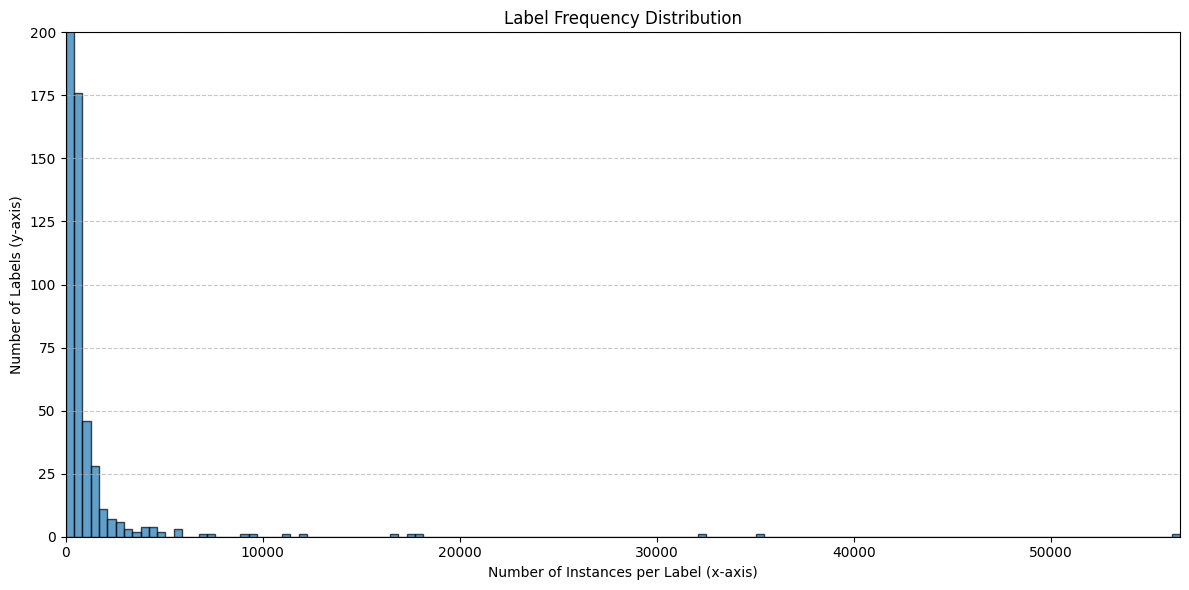

In [ ]:
from collections import Counter  # Counter Í∞ùÏ≤¥Î•º collections Î™®ÎìàÏóêÏÑú ÏûÑÌè¨Ìä∏
import matplotlib.pyplot as plt # Import matplotlib

# Í∞Å ÎùºÎ≤®Ïùò ÎπàÎèÑÏàò Í≥ÑÏÇ∞
label_counts = Counter(combined_df['KDC_NM'])

# ÎùºÎ≤®Ïùò ÎπàÎèÑÏàò (xÏ∂ïÏóê Ìï¥Îãπ)
label_frequencies = list(label_counts.values())

# Ï†ÅÏ†àÌïú bin Í∞úÏàò Í≤∞Ï†ï (ÎπàÎèÑÏàòÏùò Î∂ÑÌè¨Î•º Í∏∞Ï§ÄÏúºÎ°ú)
n_bins = int(np.sqrt(len(label_frequencies)))  # ÎπàÎèÑÏàòÏóê ÎåÄÌï¥ Ï†úÍ≥±Í∑º Î≤ïÏπô Ï†ÅÏö©

# ÎùºÎ≤® ÎπàÎèÑÏàòÎ°ú ÌûàÏä§ÌÜ†Í∑∏Îû® Íµ¨Í∞Ñ ÏÑ§Ï†ï
plt.figure(figsize=(12, 6))

# ÌûàÏä§ÌÜ†Í∑∏Îû® Í∑∏Î¶¨Í∏∞
plt.hist(
    label_frequencies,  # ÎùºÎ≤® ÎπàÎèÑÏàò ÏÇ¨Ïö©
    bins=n_bins,  # ÎèôÏ†ÅÏúºÎ°ú Í≥ÑÏÇ∞Îêú bin Í∞úÏàò
    edgecolor='black',
    alpha=0.7
)

# xÏ∂ï ÏµúÎåÄÍ∞íÏùÑ label_frequenciesÏùò ÏµúÎåìÍ∞íÏúºÎ°ú ÏÑ§Ï†ï
plt.xlim(0, max(label_frequencies))
plt.ylim(0, 200)

# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
plt.title('Label Frequency Distribution')
plt.xlabel('Number of Instances per Label (x-axis)')
plt.ylabel('Number of Labels (y-axis)')

# xÏ∂ïÏóê ÎùºÎ≤® ÎπàÎèÑÏàò ÌëúÏãú, yÏ∂ïÏóêÎäî Î†àÏù¥Î∏î Í∞úÏàò ÌëúÏãú
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Î†àÏù¥ÏïÑÏõÉ Ï°∞Ï†ï
plt.show()

In [ ]:
label_counts = Counter(combined_df['KDC_NM'])
labels_over_4000 = {label for label, count in label_counts.items() if count > 4000}

# ÌïÑÌÑ∞ÎßÅÌïòÏó¨ ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
df_over4000 = combined_df[combined_df['KDC_NM'].isin(labels_over_4000)].copy()

# Í≤∞Í≥º ÌôïÏù∏
print(df_over4000.shape)
print(df_over4000['KDC_NM'].value_counts())
print(len(df_over4000['KDC_NM'].value_counts()))

(288949, 4)
KDC_NM
813.7      56540
813.6      35036
830.0      32274
843.0      17811
833.6      17427
811.7      16841
818.0      12151
410.0      11279
810.0       9428
375.1       9256
747.0       7325
813.8       6788
811.6       5871
325.337     5819
843.6       5783
863.0       4737
740.77      4730
814.7       4469
740.0       4347
199.1       4337
400.0       4271
911.0       4154
325.211     4139
234.8       4136
Name: count, dtype: int64
24


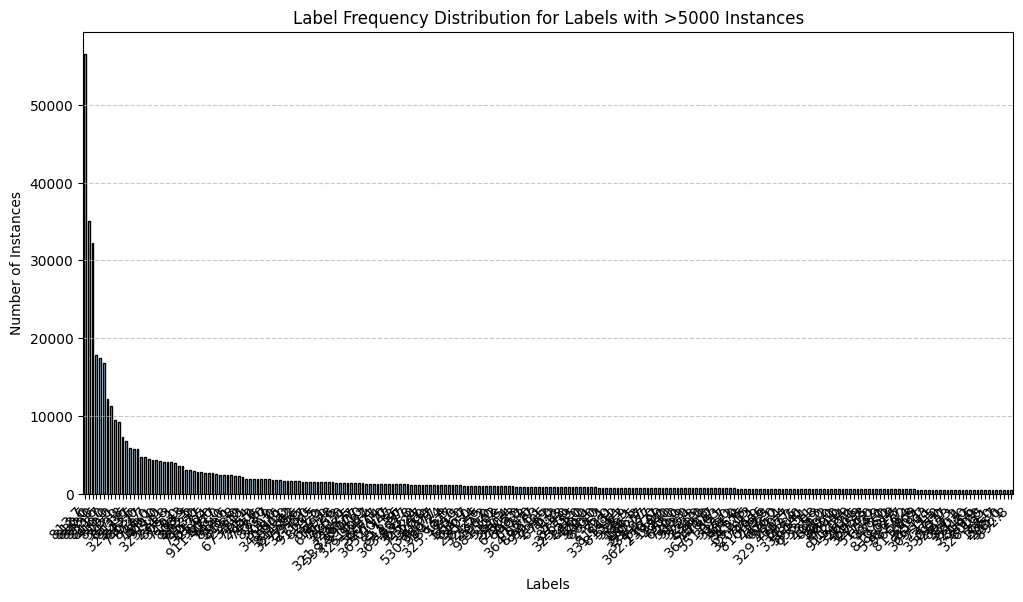

In [ ]:
# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(12, 6))
df_over500['KDC_NM'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Label Frequency Distribution for Labels with >5000 Instances')
plt.xlabel('Labels')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Data Augmentation

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')
import random
import pickle
import re

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# ÌïúÍ∏ÄÎßå ÎÇ®Í∏∞Í≥† ÎÇòÎ®∏ÏßÄÎäî ÏÇ≠Ï†ú
def get_only_hangul(line):
	parseText= re.compile('/ ^[„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£]*$/').sub('',line)

	return parseText

########################################################################
# Synonym replacement
# Replace n words in the sentence with synonyms from wordnet
########################################################################

def synonym_replacement(words, n):
	new_words = words.copy()
	random_word_list = list(set([word for word in words]))
	random.shuffle(random_word_list)
	num_replaced = 0
	for random_word in random_word_list:
		synonyms = get_synonyms(random_word)
		if len(synonyms) >= 1:
			synonym = random.choice(list(synonyms))
			new_words = [synonym if word == random_word else word for word in new_words]
			num_replaced += 1
		if num_replaced >= n:
			break

	if len(new_words) != 0:
		sentence = ' '.join(new_words)
		new_words = sentence.split(" ")

	else:
		new_words = ""

	return new_words

def get_synonyms(word):
	synomyms = []

	try:
		for syn in wordnet[word]:
			for s in syn:
				synomyms.append(s)
	except:
		pass

	return synomyms

########################################################################
# Random deletion
# Randomly delete words from the sentence with probability p
########################################################################
def random_deletion(words, p):
	if len(words) == 1:
		return words

	new_words = []
	for word in words:
		r = random.uniform(0, 1)
		if r > p:
			new_words.append(word)

	if len(new_words) == 0:
		rand_int = random.randint(0, len(words)-1)
		return [words[rand_int]]

	return new_words

########################################################################
# Random swap
# Randomly swap two words in the sentence n times
########################################################################
def random_swap(words, n):
	new_words = words.copy()
	for _ in range(n):
		new_words = swap_word(new_words)

	return new_words

def swap_word(new_words):
	random_idx_1 = random.randint(0, len(new_words)-1)
	random_idx_2 = random_idx_1
	counter = 0

	while random_idx_2 == random_idx_1:
		random_idx_2 = random.randint(0, len(new_words)-1)
		counter += 1
		if counter > 3:
			return new_words

	new_words[random_idx_1], new_words[random_idx_2] = new_words[random_idx_2], new_words[random_idx_1]
	return new_words

########################################################################
# Random insertion
# Randomly insert n words into the sentence
########################################################################
def random_insertion(words, n):
	new_words = words.copy()
	for _ in range(n):
		add_word(new_words)

	return new_words

def add_word(new_words):
	synonyms = []
	counter = 0
	while len(synonyms) < 1:
		if len(new_words) >= 1:
			random_word = new_words[random.randint(0, len(new_words)-1)]
			synonyms = get_synonyms(random_word)
			counter += 1
		else:
			random_word = ""

		if counter >= 10:
			return

	random_synonym = synonyms[0]
	random_idx = random.randint(0, len(new_words)-1)
	new_words.insert(random_idx, random_synonym)

In [ ]:
def augment_data(data, label_column, text_column, target_count):
    """
    Args:
        data (pd.DataFrame): ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
        label_column (str): ÎùºÎ≤® Ïª¨ÎüºÎ™Ö
        text_column (str): ÌÖçÏä§Ìä∏ Ïª¨ÎüºÎ™Ö
        target_count (int): ÎùºÎ≤®Î≥Ñ ÏµúÏÜå Ïù∏Ïä§ÌÑ¥Ïä§ Ïàò

    Returns:
        pd.DataFrame: Ï¶ùÍ∞ïÎêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    """
    augmented_data = []
    label_counts = Counter(data[label_column])

    for label, count in label_counts.items():
        label_data = data[data[label_column] == label]
        texts = label_data[text_column].tolist()

        # Ï¶ùÍ∞ï ÎåÄÏÉÅ ÎùºÎ≤® Ï≤òÎ¶¨
        if count < target_count:
            needed = target_count - count

            for _ in range(needed):
                # ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Ï§ë ÌïòÎÇò ÏÑ†ÌÉù
                original_text = random.choice(texts)
                original_text = str(original_text)
                words = original_text.split()

                # ÎûúÎç§ÏúºÎ°ú Ï¶ùÍ∞ï Í∏∞Î≤ï ÏÑ†ÌÉù
                augmentation_methods = [
                    lambda w: " ".join(random_deletion(w, p=0.1)),
                    lambda w: " ".join(random_swap(w, n=2)),
                    lambda w: " ".join(random_insertion(w, n=2)),
                    lambda w: " ".join(synonym_replacement(w, n=2))
                ]

                augmented_text = random.choice(augmentation_methods)(words)

                # Ï¶ùÍ∞ïÎêú ÌÖçÏä§Ìä∏ÏôÄ ÎùºÎ≤® Ï†ÄÏû•, ÎÇòÎ®∏ÏßÄ Ïó¥ÏùÄ ÏõêÎ≥∏ÏóêÏÑú Í∞ÄÏ†∏Ïò¥
                augmented_row = {label_column: label, text_column: augmented_text}
                for column in data.columns:
                    if column not in [label_column, text_column]:
                        augmented_row[column] = label_data[column].iloc[0]

                augmented_data.append(augmented_row)

    # Ï¶ùÍ∞ï Îç∞Ïù¥ÌÑ∞ÏôÄ ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
    augmented_df = pd.DataFrame(augmented_data)
    final_data = pd.concat([data, augmented_df], ignore_index=True)
    return final_data

In [ ]:
augmented_df = augment_data(df_over4000, "KDC_NM", "description", 5000)

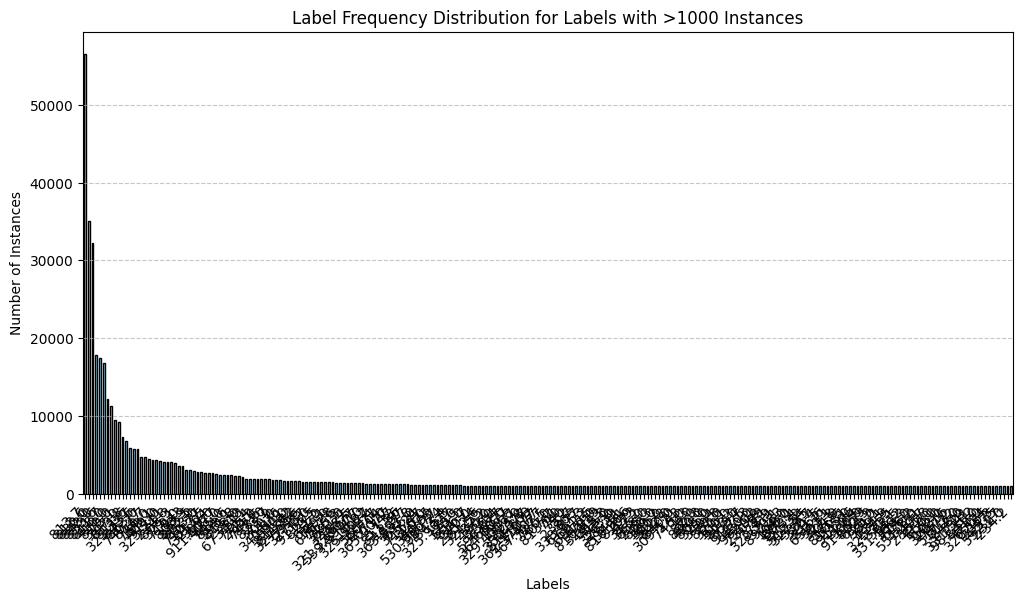

In [ ]:
# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(12, 6))
augmented_df['KDC_NM'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Label Frequency Distribution for Labels with >1000 Instances')
plt.xlabel('Labels')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
augmented_df.shape

(294629, 4)

In [ ]:
len(augmented_df['KDC_NM'].value_counts())

24

In [ ]:
augmented_df['KDC_NM'].value_counts()

KDC_NM
813.7      56540
813.6      35036
830.0      32274
843.0      17811
833.6      17427
811.7      16841
818.0      12151
410.0      11279
810.0       9428
375.1       9256
747.0       7325
813.8       6788
811.6       5871
325.337     5819
843.6       5783
740.77      5000
814.7       5000
234.8       5000
863.0       5000
199.1       5000
740.0       5000
325.211     5000
400.0       5000
911.0       5000
Name: count, dtype: int64

### Random Under Sampling

In [ ]:
from sklearn.utils import resample

def random_undersample(data, label_column, target_count):
    """
    ÏßÄÏ†ïÎêú target_countÎ≥¥Îã§ ÎßéÏùÄ ÎùºÎ≤®Ïùò Îç∞Ïù¥ÌÑ∞Î•º ÎûúÎç§ÌïòÍ≤å Ï§ÑÏù¥Îäî Ìï®Ïàò.

    Args:
        data (pd.DataFrame): ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
        label_column (str): ÎùºÎ≤® Ïª¨ÎüºÎ™Ö
        target_count (int): Î™©Ìëú ÎùºÎ≤®Ïùò ÏµúÏÜå Ïù∏Ïä§ÌÑ¥Ïä§ Ïàò

    Returns:
        pd.DataFrame: ÎûúÎç§ Ïñ∏ÎçîÏÉòÌîåÎßÅ ÌõÑÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    """
    undersampled_data = []

    # Í∞Å ÎùºÎ≤®Î≥Ñ Ïù∏Ïä§ÌÑ¥Ïä§ Í∞úÏàò ÏÑ∏Í∏∞
    label_counts = data[label_column].value_counts()

    for label, count in label_counts.items():
        label_data = data[data[label_column] == label]

        # ÎùºÎ≤®Ïùò Í∞úÏàòÍ∞Ä target_countÎ≥¥Îã§ ÎßéÏùÑ Í≤ΩÏö∞ ÎûúÎç§ÌïòÍ≤å Ï§ÑÏù¥Í∏∞
        if count > target_count:
            # target_countÎ°ú ÏÉòÌîåÎßÅ
            label_data = resample(label_data,
                                  replace=False,  # ÏÉòÌîåÎßÅÏùÄ Ï§ëÎ≥µ ÏóÜÏù¥
                                  n_samples=target_count,  # ÏßÄÏ†ïÎêú Í∞úÏàòÎßåÌÅº
                                  random_state=42)

        # Ïñ∏ÎçîÏÉòÌîåÎßÅÎêú Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•
        undersampled_data.append(label_data)

    # Î¶¨Ïä§Ìä∏Î°ú Ï†ÄÏû•Îêú Î™®Îì† Îç∞Ïù¥ÌÑ∞Î•º ÌïòÎÇòÎ°ú Ìï©Ïπ®
    final_data = pd.concat(undersampled_data, ignore_index=True)

    return final_data

In [ ]:
final_df = random_undersample(augmented_df, "KDC_NM", 10000)

In [ ]:
final_df.shape

(452541, 4)

In [ ]:
final_df.isna().sum()

TITLE_NM            0
ISBN_THIRTEEN_NO    0
KDC_NM              0
description         0
dtype: int64

In [ ]:
final_df = final_df.dropna(subset=['description'])

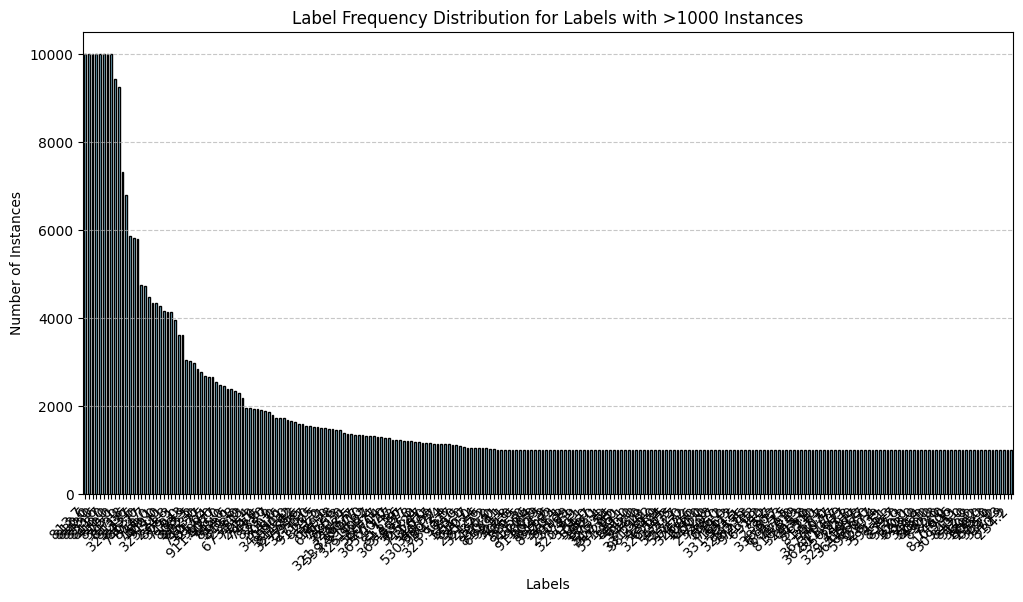

In [ ]:
# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(12, 6))
final_df['KDC_NM'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Label Frequency Distribution for Labels with >1000 Instances')
plt.xlabel('Labels')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
len(final_df['KDC_NM'].unique())

248

## (3) ÌÜ†ÌÅ∞ Ïàò managing

In [ ]:
!pip install sentencepiece
!pip install transformers
!pip install torch
!pip install 'git+https://github.com/SKTBrain/KoBERT.git#egg=kobert_tokenizer&subdirectory=kobert_hf'

  Cloning https://github.com/SKTBrain/KoBERT.git to /tmp/pip-install-g9bmpitx/kobert-tokenizer_67e9c43fdc0b4db29e6c4008f6f667ff
  Running command git clone --filter=blob:none --quiet https://github.com/SKTBrain/KoBERT.git /tmp/pip-install-g9bmpitx/kobert-tokenizer_67e9c43fdc0b4db29e6c4008f6f667ff
  Resolved https://github.com/SKTBrain/KoBERT.git to commit 5c46b1c68e4755b54879431bd302db621f4d2f47
  Preparing metadata (setup.py) ... done
  Created wheel for kobert_tokenizer: filename=kobert_tokenizer-0.1-py3-none-any.whl size=4633 sha256=3adaf776257d6702f7c3e555b245ec1fb06b362ad1a6fd7e98c67663d0504d90
  Stored in directory: /tmp/pip-ephem-wheel-cache-oqjtt5rc/wheels/b7/95/7c/3f38b039ae9422cc4a51702b37e352d0585442cbe60285f1f2
Successfully built kobert_tokenizer


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/371k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/244 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'XLNetTokenizer'. 
The class this function is called from is 'KoBERTTokenizer'.


ÌèâÍ∑† ÌÜ†ÌÅ∞ Ïàò: 97.25763853440904
ÏµúÎåÄ ÌÜ†ÌÅ∞ Ïàò: 11873
ÏµúÏÜå ÌÜ†ÌÅ∞ Ïàò: 1


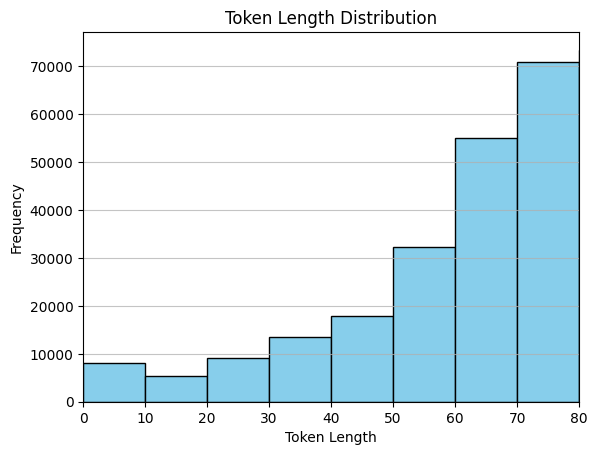

In [ ]:
import matplotlib.pyplot as plt
from kobert_tokenizer import KoBERTTokenizer
from transformers import BertTokenizer

# KoBERT ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Î°úÎìú
tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')

# ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º ÌÜ†ÌÅ∞ÌôîÌïòÍ≥† Í∞Å ÌÖçÏä§Ìä∏Ïùò ÌÜ†ÌÅ∞ ÏàòÎ•º Í≥ÑÏÇ∞
token_lengths = final_df["description"].astype(str).apply(lambda x: len(tokenizer.tokenize(x)))

# ÌèâÍ∑†, ÏµúÎåÄ, ÏµúÏÜåÍ∞í Í≥ÑÏÇ∞
average_length = token_lengths.mean()
max_length = token_lengths.max()
min_length = token_lengths.min()

print(f"ÌèâÍ∑† ÌÜ†ÌÅ∞ Ïàò: {average_length}")
print(f"ÏµúÎåÄ ÌÜ†ÌÅ∞ Ïàò: {max_length}")
print(f"ÏµúÏÜå ÌÜ†ÌÅ∞ Ïàò: {min_length}")

# ÌûàÏä§ÌÜ†Í∑∏Îû® ÏãúÍ∞ÅÌôî
plt.hist(token_lengths, bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], color='skyblue', edgecolor='black')
plt.xlim(left=0,right=80)  # xlim(right=Í∞í)ÏúºÎ°ú ÏµúÎåÄÍ∞íÏùÑ ÏÑ§Ï†ï
plt.title("Token Length Distribution")
plt.xlabel("Token Length")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.75)
plt.show()

In [ ]:
# 90%, 95% Î∞±Î∂ÑÏúÑÏàò Í≥ÑÏÇ∞
percentile_90 = np.percentile(token_lengths, 90)
percentile_95 = np.percentile(token_lengths, 95)

print(f"90% Î∞±Î∂ÑÏúÑÏàò: {percentile_90}")
print(f"95% Î∞±Î∂ÑÏúÑÏàò: {percentile_95}")

90% Î∞±Î∂ÑÏúÑÏàò: 134.0
95% Î∞±Î∂ÑÏúÑÏàò: 222.0


In [ ]:
count_over_240 = (token_lengths >= 221).sum()
print(f"ÌÜ†ÌÅ∞ Í∞úÏàòÍ∞Ä 240Í∞ú Ïù¥ÏÉÅÏù∏ ÌñâÏùò Í∞úÏàò: {count_over_240}")

ÌÜ†ÌÅ∞ Í∞úÏàòÍ∞Ä 240Í∞ú Ïù¥ÏÉÅÏù∏ ÌñâÏùò Í∞úÏàò: 22871


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from kobert_tokenizer import KoBERTTokenizer
from transformers import BertTokenizer
from nltk.tokenize import sent_tokenize  # Î¨∏Ïû• Î∂ÑÎ¶¨Î•º ÏúÑÌï¥ NLTK ÏÇ¨Ïö©

# KoBERT Tokenizer
tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')

# ÌïúÍµ≠Ïñ¥ Î∂àÏö©Ïñ¥ Î™©Î°ù
stopwords = [
    'Ïù¥', 'Í∑∏', 'Ï†Ä', 'Í≤É', 'Ïàò', 'Îì±', 'Îì§', 'Ïù¥Îã§', 'Í∞Ä', 'Ïù¥', 'Í∑∏Î†áÎã§', 'Ïùò', 'Ïóê', 'ÏóêÏÑú', 'Î•º', 'ÏúºÎ°ú',
    'Í≥†', 'Ìïú', 'Í≥º', 'ÎèÑ', 'Îßå', 'Î≥¥Îã§', 'Îã§', 'Ï¢Ä', 'Ïûê'
]

def summarize_by_tfidf(df, column_name, token_limit, top_n=3):
    # ÌÜ†ÌÅ∞ Ïàò Í≥ÑÏÇ∞ Ìï®Ïàò
    def token_count(text):
        return len(tokenizer.tokenize(text))

    # ÏÉàÎ°úÏö¥ Ïó¥Ïóê ÌÜ†ÌÅ∞ Ïàò Ï∂îÍ∞Ä
    df['token_count'] = df[column_name].apply(token_count)

    # ÌÜ†ÌÅ∞ ÏàòÍ∞Ä ÏùºÏ†ï Ïù¥ÏÉÅÏù∏ Îç∞Ïù¥ÌÑ∞Îßå Ï∂îÏ∂ú
    df_to_summarize = df[df['token_count'] >= token_limit]

    # Î¨∏Ïû• Îã®ÏúÑ TF-IDF ÏöîÏïΩ Ìï®Ïàò
    def summarize_tfidf_sentences(text, ngram_range=(1, 1), top_n=3):
        # ÌÖçÏä§Ìä∏Î•º Î¨∏Ïû• Îã®ÏúÑÎ°ú Î∂ÑÎ¶¨
        sentences = sent_tokenize(text)

        if len(sentences) <= top_n:
            return text  # Î¨∏Ïû•Ïù¥ Ï†ÅÏúºÎ©¥ Ï†ÑÏ≤¥ Î∞òÌôò

        # TF-IDF Î≤°ÌÑ∞ÎùºÏù¥Ï†Ä ÏÉùÏÑ±
        vectorizer = TfidfVectorizer(stop_words=stopwords, ngram_range=ngram_range)
        tfidf_matrix = vectorizer.fit_transform(sentences)

        # TF-IDF Ï†êÏàòÎ•º Ìï©ÏÇ∞ÌïòÏó¨ Ï§ëÏöîÌïú Î¨∏Ïû•ÏùÑ Ï∞æÏùå
        scores = np.array(tfidf_matrix.sum(axis=1)).flatten()

        # ÏÉÅÏúÑ NÍ∞úÏùò Ï†êÏàòÎ•º Í∞ÄÏßÑ Î¨∏Ïû• ÏÑ†ÌÉù
        top_indices = scores.argsort()[-top_n:][::-1]  # Ï§ëÏöîÎèÑ ÎÜíÏùÄ Ïù∏Îç±Ïä§ Ï†ïÎ†¨

        # Ïù∏Îç±Ïä§Î•º Ï†ïÏàò Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò
        top_indices = top_indices.tolist()

        # Ï§ëÏöîÌïú Î¨∏Ïû•Îßå Î∞òÌôò
        important_sentences = [sentences[i] for i in top_indices]
        return ' '.join(important_sentences)

    # Í∞Å ÌÖçÏä§Ìä∏Ïóê ÎåÄÌï¥ TF-IDFÎ°ú Ï§ëÏöîÌïú Î¨∏Ïû• Ï∂îÏ∂ú
    df_to_summarize[column_name] = df_to_summarize[column_name].apply(
        lambda text: summarize_tfidf_sentences(text, top_n=top_n)
    )

    # ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê ÏöîÏïΩÎêú ÌÖçÏä§Ìä∏ ÎåÄÏ≤¥
    df.update(df_to_summarize)

    # Î∂àÌïÑÏöîÌïú Ïó¥ Ï†úÍ±∞
    df.drop(columns=['token_count'], inplace=True)

    return df

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'XLNetTokenizer'. 
The class this function is called from is 'KoBERTTokenizer'.


In [ ]:
# ÏòàÏãú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
data = {
    'text': [
        '<ÌïòÎ£® 5Î∂Ñ ÏóÑÎßà Î™©ÏÜåÎ¶¨„ÄâÎ°ú ÌÉúÍµê ÎèôÌôîÏóê ÏÉàÎ°úÏö¥ Î∞©Ìñ•ÏùÑ Ï†úÏãúÌïú Ï†ïÌôç ÏûëÍ∞ÄÏùò ÌõÑÏÜçÏûë „ÄàÌïòÎ£® 5Î∂Ñ ÏïÑÎπ† Î™©ÏÜåÎ¶¨„ÄâÍ∞Ä Ï∂úÍ∞ÑÎêúÎã§. Ï†ÑÌé∏Ïù¥ ÏóÑÎßàÎ•º ÏúÑÌïú Ï±ÖÏù¥ÏóàÎã§Î©¥, Ïù¥Î≤àÏùÄ ÏïÑÎπ†Î•º ÏúÑÌïú Ï∞ΩÏûë ÎèôÌôî 10Ìé∏ÏúºÎ°ú Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÎã§. ÎßéÏùÄ ÎèÖÏûêÎì§Î°úÎ∂ÄÌÑ∞ ÏÇ¨Îûë Î∞õÏùÄ „ÄàÌïòÎ£® 5Î∂Ñ ÏóÑÎßà Î™©ÏÜåÎ¶¨„ÄâÏôÄ Í∞ôÏùÄ Íµ¨ÏÑ±ÏúºÎ°ú, ‚ÄòÏïÑÎπ†Î•º ÏúÑÌïú ÎèôÌôî‚ÄôÏôÄ ‚ÄòÏïÑÍ∏∞ÏóêÍ≤å ÏùΩÏñ¥Ï£ºÎäî ÏßßÏùÄ ÌÉúÍµê ÎèôÌôî‚ÄôÍ∞Ä Ìï®Íªò ÏàòÎ°ùÎêòÏñ¥ ÏûàÎã§. Í∑∏Î¶¨Í≥† ÎèôÌôîÎ•º ÏùΩÍ≥† ÎÇú ÌõÑ ÏïÑÎπ†Ïùò ÏÉùÍ∞ÅÏùÑ Ï†ïÎ¶¨Ìï¥ ÏïÑÏù¥ÏóêÍ≤å Ï†ÑÎã¨Ìï¥Ï£ºÎäî ‚ÄòÏïÑÎπ†Ïùò ÏÉùÍ∞ÅÎ≥¥Îî∞Î¶¨‚ÄôÎ°ú ÎçßÎ∂ôÏó¨ ÏûàÎã§. ÌäπÌûà Ï†ÑÌé∏ÏóêÏÑú ÎèôÌôîÎ•º ÌÜµÌï¥ ÏïÑÍ∏∞ÏóêÍ≤å ÏÇ¨ÎûëÏùÑ Îì¨Îøç Ï†ÑÌï¥Ï§Ñ Ïàò ÏûàÏóàÎã§Î©¥, Ïù¥Î≤à ÏïÑÎπ†Ïùò ÌÉúÍµê ÎèôÌôîÎäî ÏÇ∂ÏùÑ ÏÇ¥ÏïÑÍ∞à Îïå ÌûòÏù¥ ÎêòÏñ¥Ï§Ñ ÏßÄÌòúÎ•º ÌÇ§Ïö∞Îäî Ïù¥ÏïºÍ∏∞Îì§Î°ú Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÎã§.',
        'ÏÇ¨Î©¥ Ïò§Î•¥Îäî ÎØ∏Íµ≠ Ï£ºÏãù, Ïù¥Ï†ú ÎãπÏã†ÎèÑ Ï∞æÏùÑ Ïàò ÏûàÏäµÎãàÎã§. 33Îßå Íµ¨ÎèÖÏûêÍ∞Ä Ïã†Î¢∞ÌïòÎäî ‚ÄòÎØ∏Ï£ºÏùÄ‚ÄôÏùò ÎØ∏Íµ≠ Ï£ºÏãù Ìà¨Ïûê ÍµêÍ≥ºÏÑú Ï£ºÍ∞ÄÍ∞Ä Ïò§Î•¥Î©¥ Îî∞ÎùºÍ∞ÄÍ≥†, Îñ®Ïñ¥ÏßÄÎ©¥ Î∂àÏïàÌï¥ÌïòÎ©∞ ÌåîÏïÑÎ≤ÑÎ¶¨Îäî ÏïÖÏàúÌôò. ÏàòÏùµÏù¥ ÎÇ¨Îã§Í∞ÄÎèÑ Í∏àÏÑ∏ ÏÇ¨ÎùºÏßÄÍ≥†, Ï¢ÖÎ™©ÏùÑ Í≥†Î•º ÎïåÎßàÎã§ Î∂àÏïàÍ≥º Ï¥àÏ°∞Ìï®Ïù¥ ÏïûÏÑúÎäî Í≤ΩÌóòÏùÄ ÎàÑÍµ¨ÏóêÍ≤åÎÇò ÎÇØÏÑ§ÏßÄ ÏïäÎã§. „ÄéÎØ∏Íµ≠ Ï£ºÏãù Ìà¨ÏûêÏùò Ï†ïÏÑù„ÄèÏùÄ Î∞îÎ°ú Ïù¥Îü∞ Í≥†ÎØºÏóê Îπ†ÏßÑ Í∞úÏù∏ Ìà¨ÏûêÏûêÎì§ÏùÑ ÏúÑÌï¥ ÌÉÑÏÉùÌïú Ï±ÖÏù¥Îã§. Ï†ÄÏûê ÎØ∏Ï£ºÏùÄÏùÄ ÏßÄÎÇú 5ÎÖÑÍ∞Ñ Îß§Ïùº 10ÏãúÍ∞Ñ Ïù¥ÏÉÅÏùÑ Ï£ºÏãùÍ≥º Ïî®Î¶ÑÌïòÎ©∞ Ïã§Ï†Ñ Í≤ΩÌóòÍ≥º Î∞©ÎåÄÌïú ÏßÄÏãùÏùÑ ÏåìÏïÑÏôîÎã§. Í∑∏Îäî ‚ÄòÌà¨ÏûêÏóêÏÑú Ïã§Ìå®ÌïòÎäî Í∞ÄÏû• ÌÅ∞ Ïù¥Ïú†Îäî Î™ÖÌôïÌïú Ìà¨Ïûê Í∏∞Ï§ÄÏù¥ ÏóÜÍ∏∞ ÎïåÎ¨∏‚ÄôÏù¥ÎùºÍ≥† Í∞ïÏ°∞ÌïúÎã§. Í∞êÏ†ïÏóê ÌúòÎëòÎ¶¨Îäî Ìà¨ÏûêÏóêÏÑú Î≤óÏñ¥ÎÇò ÎÖºÎ¶¨Ï†ÅÏù¥Í≥† Ï≤¥Í≥ÑÏ†ÅÏù∏ Í∏∞Ï§ÄÏùÑ ÏÑ∏ÏõåÏïºÎßå, ÏãúÏû•Ïùò Ïò§Î•¥ÎÇ¥Î¶ºÏóê ÌùîÎì§Î¶¨ÏßÄ ÏïäÍ≥† Íæ∏Ï§ÄÌûà ÏÑ±Í≥µÏ†ÅÏù∏ Ìà¨ÏûêÎ•º Ïù¥Ïñ¥Í∞à Ïàò ÏûàÎã§. Ïù¥ Ï±ÖÏùÄ Ïôú ÎØ∏Íµ≠ Ï£ºÏãùÏù¥Ïñ¥Ïïº ÌïòÎäîÏßÄÎ∂ÄÌÑ∞ ÏãúÏûëÌï¥, Ïã§Ìå®Î•º Ï§ÑÏù¥Í≥† ÏÑ±Í≥µ ÌôïÎ•†ÏùÑ ÎÜíÏù¥Îäî Î∞©Î≤ï, Í∑∏Î¶¨Í≥† Îç∞Ïù¥ÌÑ∞Ïóê Í∏∞Î∞òÌïú ÌôïÏã§Ìïú Ìà¨Ïûê Ï†ÑÎûµÍπåÏßÄÎ•º Ï¥ùÎßùÎùºÌñàÎã§. ÌäπÌûà, Îß§ÌÅ¨Î°ú Í≤ΩÏ†úÏôÄ ÏãúÏû• Ïã¨Î¶¨ Î∂ÑÏÑù, Ï¢ÖÎ™© ÏÑ†Ï†ï Í∏∞Ï§Ä, Ï∞®Ìä∏Î•º ÌôúÏö©Ìïú Ïã§Ï†Ñ Ìà¨ÏûêÎ≤ïÍπåÏßÄ ÏïÑÏö∞Î•¥Î©∞ Í∞úÏù∏ Ìà¨ÏûêÏûêÏóêÍ≤å Ïã§ÏßàÏ†ÅÏù∏ ÎèÑÏõÄÏùÑ Ï†úÍ≥µÌïúÎã§. Ïñ¥Îñ§ Ï¢ÖÎ™©ÏùÑ ÏÇ¨Ïïº Ìï†ÏßÄ, Ïñ∏Ï†ú ÏÇ¨Í≥†ÌåîÏïÑÏïº Ìï†ÏßÄ Î™∞Îùº ÎßâÎßâÌñàÎçò Í∞úÏù∏ Ìà¨ÏûêÏûêÎì§ÏóêÍ≤å „ÄéÎØ∏Íµ≠ Ï£ºÏãù Ìà¨ÏûêÏùò Ï†ïÏÑù„ÄèÏùÄ Î™ÖÌôïÌïú Ìà¨Ïûê Î∞©Ìñ•ÏùÑ Ï†úÏãúÌïúÎã§. Ï¥àÎ≥¥ Ìà¨ÏûêÏûêÎäî Î¨ºÎ°†, Í∏∞Ï°¥ Ìà¨ÏûêÏóêÏÑú Ïã§Ìå®Î•º Í≤ΩÌóòÌñàÍ±∞ÎÇò Ïû¨ÎèÑÏïΩÌïòÎ†§Îäî Ï§ëÍ∏â Ìà¨ÏûêÏûêÍπåÏßÄ Ìè≠ÎÑìÍ≤å Ï†ÅÏö©Ìï† Ïàò ÏûàÎã§. Ïù¥ Ï±ÖÏù¥ ÌäπÎ≥ÑÌïú Ïù¥Ïú† Ïôú ÎØ∏Íµ≠ Ï£ºÏãùÏù¥Ïñ¥Ïïº ÌïòÎäîÍ∞Ä: Í∏ÄÎ°úÎ≤å ÏãúÏû•ÏóêÏÑú ÎØ∏Íµ≠ Ï£ºÏãùÏù¥ Ï£ºÎäî Í∏∞Ìöå Ïã§Ìå®Î•º Ï§ÑÏù¥Îäî Ìà¨Ïûê ÏõêÏπô: ÌùîÌûà Îπ†ÏßÄÎäî Ìï®Ï†ïÏùÑ Í∑πÎ≥µÌïòÎäî Î≤ï Ï¢ÖÎ™© ÏÑ†ÌÉùÏùò ÎπÑÎ∞Ä: ÎØ∏ÎûòÎ•º Ïù¥ÎÅÑÎäî ÏµúÍ≥†Ïùò ÏÑ±Ïû•Ï£º Ï∞æÎäî Î≤ï Í≤ΩÏ†ú ÌùêÎ¶Ñ ÏùΩÍ∏∞: Ïó∞Ï§ÄÏùò Í∏àÎ¶¨ÏôÄ Í≤ΩÏ†ú ÏßÄÌëú ÌôúÏö©Î≤ï ÏÑ±Í≥µÏ†ÅÏù∏ Ìà¨Ïûê Ïã¨Î¶¨ Í¥ÄÎ¶¨: FOMO(ÎÜìÏπ† Í≤É Í∞ôÏùÄ ÎëêÎ†§ÏõÄ) Í∑πÎ≥µÍ≥º ÎÖºÎ¶¨Ï†Å ÏÇ¨Í≥†Ïùò Ï§ëÏöîÏÑ± Ïù¥Ï†ú Îçî Ïù¥ÏÉÅ Ï£ºÍ∞ÄÏùò Ïò§Î•¥ÎÇ¥Î¶ºÏóê ÌùîÎì§Î¶¥ ÌïÑÏöî ÏóÜÎã§. „ÄéÎØ∏Íµ≠ Ï£ºÏãù Ìà¨ÏûêÏùò Ï†ïÏÑù„ÄèÍ≥º Ìï®ÍªòÎùºÎ©¥ Î∞òÎ≥µÎêòÎäî Ìà¨Ïûê Ïã§Ìå®ÏôÄ Î∂àÏïàÏùÄ ÏÇ¨ÎùºÏßÄÍ≥†, Í∑∏ ÏûêÎ¶¨Î•º ÌôïÏã†Í≥º ÏûêÏã†Í∞êÏù¥ Ï±ÑÏö∏ Í≤ÉÏù¥Îã§. Î™ÖÌôïÌïú Ìà¨Ïûê Ï†ÑÎûµÏúºÎ°ú ÌùîÎì§Î¶¨ÏßÄ ÏïäÎäî ÎãπÏã†ÎßåÏùò Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Î•º ÏÑ§Í≥ÑÌï¥ Î≥¥Ïûê.',
        'KoBERTÎäî ÌïúÍµ≠Ïñ¥Ïóê ÌäπÌôîÎêú BERT Î™®Îç∏ÏûÖÎãàÎã§.',
        'ÏßßÏùÄ Î¨∏Ïû•.'
    ]
}

df = pd.DataFrame(data)

# TF-IDF ÏöîÏïΩ ÏàòÌñâ
summarized_df = summarize_by_tfidf(df, 'text',5)

# Í≤∞Í≥º Ï∂úÎ†•
print(summarized_df)

                                                text
0  ÌäπÌûà Ï†ÑÌé∏ÏóêÏÑú ÎèôÌôîÎ•º ÌÜµÌï¥ ÏïÑÍ∏∞ÏóêÍ≤å ÏÇ¨ÎûëÏùÑ Îì¨Îøç Ï†ÑÌï¥Ï§Ñ Ïàò ÏûàÏóàÎã§Î©¥, Ïù¥Î≤à ÏïÑÎπ†Ïùò ...
1  Ïù¥ Ï±ÖÏù¥ ÌäπÎ≥ÑÌïú Ïù¥Ïú† Ïôú ÎØ∏Íµ≠ Ï£ºÏãùÏù¥Ïñ¥Ïïº ÌïòÎäîÍ∞Ä: Í∏ÄÎ°úÎ≤å ÏãúÏû•ÏóêÏÑú ÎØ∏Íµ≠ Ï£ºÏãùÏù¥ Ï£ºÎäî...
2                       KoBERTÎäî ÌïúÍµ≠Ïñ¥Ïóê ÌäπÌôîÎêú BERT Î™®Îç∏ÏûÖÎãàÎã§.
3                                             ÏßßÏùÄ Î¨∏Ïû•.


<ipython-input-51-b7c10c7ff5ad>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_summarize[column_name] = df_to_summarize[column_name].apply(


In [ ]:
final_df = summarize_by_tfidf(final_df, 'description', token_limit=221)

<ipython-input-51-b7c10c7ff5ad>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_summarize[column_name] = df_to_summarize[column_name].apply(


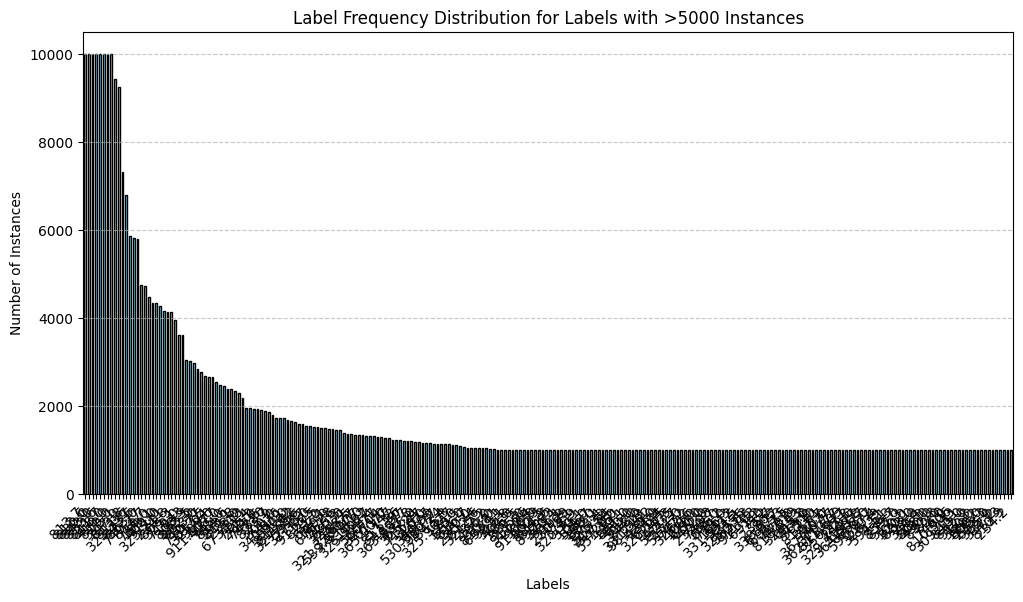

In [ ]:
# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(12, 6))
final_df['KDC_NM'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Label Frequency Distribution for Labels with >5000 Instances')
plt.xlabel('Labels')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
len(final_df['KDC_NM'].unique())

248

# KoBERT Model

In [ ]:
!pip install mxnet
!pip install gluonnlp pandas tqdm

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 49.1/49.1 MB 48.0 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.3
    Uninstalling graphviz-0.20.3:
      Successfully uninstalled graphviz-0.20.3
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 344.5/344.5 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp311-cp311-linux_x86_64.whl size=679483 sha256=726da97a01f2812d1e67852164a11d2a2b6a9e15abf562de100932ad3bd0825a
  Stored in directory: /root/.cache/pip/wheels/29/64/e3/047328bfc4a551696adc4a82dba3c980a1dad62198b8a3bb83
Successfully built gluonnlp


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'XLNetTokenizer'. 
The class this function is called from is 'KoBERTTokenizer'.


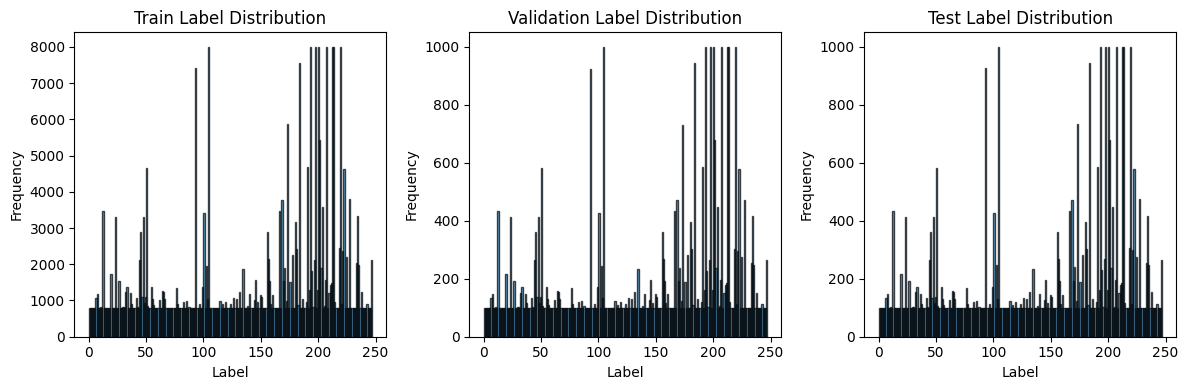

248


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm, tqdm_notebook
from kobert_tokenizer import KoBERTTokenizer
from torch.utils.data import Dataset, DataLoader, Subset
from transformers import BertTokenizer, BertModel, AdamW, get_scheduler
from sklearn.model_selection import train_test_split
from torch.cuda.amp import GradScaler, autocast

# Îç∞Ïù¥ÌÑ∞ÏÖã Ï†ïÏùò
class BookDataset(Dataset):
    def __init__(self, data, tokenizer, max_length):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.label_to_index = {label: idx for idx, label in enumerate(sorted(data['KDC_NM'].dropna().astype(str).unique()))}

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        item = self.data.iloc[idx]
        title = item['TITLE_NM']
        description = item['description']
        label = str(item['KDC_NM'])

        label_idx = self.label_to_index[label]

        input_text = title + " " + description
        encoding = self.tokenizer(
            input_text,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors="pt"
        )

        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'label': label_idx
        }

# Î™®Îç∏ Ï†ïÏùò
class BERTClassifier(nn.Module):
    def __init__(self, bert_model, num_classes):
        super(BERTClassifier, self).__init__()
        self.bert = bert_model
        self.classifier = nn.Linear(self.bert.config.hidden_size, num_classes)

        for param in self.bert.parameters():
            param.requires_grad = True

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.last_hidden_state[:, 0, :]
        logits = self.classifier(cls_output)
        return logits

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞
MAX_LENGTH = 221
BATCH_SIZE = 32
LEARNING_RATE = 2e-5
EPOCHS = 40
GRAD_ACCUMULATION_STEPS = 4

# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
final_df['KDC_NM'] = final_df['KDC_NM'].astype(str)
tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')
dataset = BookDataset(final_df, tokenizer, MAX_LENGTH)

# Îç∞Ïù¥ÌÑ∞ÏÖã ÎÇòÎàÑÍ∏∞
labels = final_df['KDC_NM'].astype(str).values
indices = list(range(len(final_df)))

train_indices, temp_indices = train_test_split(
    indices, test_size=0.2, stratify=labels, random_state=42
)
val_indices, test_indices = train_test_split(
    temp_indices, test_size=0.5, stratify=[labels[i] for i in temp_indices], random_state=42
)

train_dataset = Subset(dataset, train_indices)
val_dataset = Subset(dataset, val_indices)
test_dataset = Subset(dataset, test_indices)

# DataLoader ÏÉùÏÑ±
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4, pin_memory=True, prefetch_factor=2)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4, pin_memory=True, prefetch_factor=2)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4, pin_memory=True, prefetch_factor=2)

# Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú ÎùºÎ≤® Ï∂îÏ∂ú
train_labels = [sample['label'] for sample in train_dataset]
val_labels = [sample['label'] for sample in val_dataset]
test_labels = [sample['label'] for sample in test_dataset]

# ÎùºÎ≤® Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 4))

# Train Îç∞Ïù¥ÌÑ∞ÏÖã ÎùºÎ≤® Î∂ÑÌè¨
plt.subplot(1, 3, 1)
plt.hist(train_labels, bins=np.arange(min(train_labels), max(train_labels)+1, 1), edgecolor='black', alpha=0.7)
plt.title('Train Label Distribution')
plt.xlabel('Label')
plt.ylabel('Frequency')

# Validation Îç∞Ïù¥ÌÑ∞ÏÖã ÎùºÎ≤® Î∂ÑÌè¨
plt.subplot(1, 3, 2)
plt.hist(val_labels, bins=np.arange(min(val_labels), max(val_labels)+1, 1), edgecolor='black', alpha=0.7)
plt.title('Validation Label Distribution')
plt.xlabel('Label')
plt.ylabel('Frequency')

# Test Îç∞Ïù¥ÌÑ∞ÏÖã ÎùºÎ≤® Î∂ÑÌè¨
plt.subplot(1, 3, 3)
plt.hist(test_labels, bins=np.arange(min(test_labels), max(test_labels)+1, 1), edgecolor='black', alpha=0.7)
plt.title('Test Label Distribution')
plt.xlabel('Label')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Î†àÏù¥Î∏îÎ≥Ñ ÏÉòÌîå Í∞úÏàò Í≥ÑÏÇ∞
from collections import Counter

# Extract labels from the dataset's data attribute
labels = dataset.data['KDC_NM'].astype(str).tolist()
label_counts = Counter([dataset.label_to_index[label] for label in labels])

# ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò Í≥ÑÏÇ∞: Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò / (ÌÅ¥ÎûòÏä§ Ïàò * Ìï¥Îãπ ÌÅ¥ÎûòÏä§ ÏÉòÌîå Ïàò)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = len(dataset.label_to_index)  # Replace with your model's actual number of output classes
total_samples = sum(label_counts.values())
print(num_classes)

# Í∞ÄÏ§ëÏπò Î¶¨Ïä§Ìä∏ Ï¥àÍ∏∞Ìôî
class_weights = [total_samples / (num_classes * label_counts.get(i, 1)) for i in range(num_classes)]

# Í∞ÄÏ§ëÏπòÎ•º ÌÖêÏÑúÎ°ú Î≥ÄÌôò
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float).to(device)

In [ ]:
# 'KDC_NM' Ïó¥ÏùÑ Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò
final_df['KDC_NM'] = final_df['KDC_NM'].astype(str)

# Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Í≥†Ïú† ÎùºÎ≤® ÌôïÏù∏
unique_labels = final_df['KDC_NM'].unique()
print(f"Îç∞Ïù¥ÌÑ∞ÏÖã Í≥†Ïú† ÎùºÎ≤® Í∞úÏàò: {len(unique_labels)}")

# Îß§Ìïë ÌÖåÏù¥Î∏î ÌôïÏù∏
print(f"Îß§Ìïë ÌÖåÏù¥Î∏î ÌÅ¨Í∏∞: {len(dataset.label_to_index)}")  # 18141 Ï∂úÎ†• ÏòàÏÉÅ

# Îß§Ìïë ÌÖåÏù¥Î∏îÏóê Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Í≥†Ïú† ÎùºÎ≤®Ïù¥ Î™®Îëê Ìè¨Ìï®ÎêòÏñ¥ ÏûàÎäîÏßÄ ÌôïÏù∏
missing_labels = [label for label in unique_labels if label not in dataset.label_to_index]
if missing_labels:
    print(f"Îß§ÌïëÎêòÏßÄ ÏïäÏùÄ ÎùºÎ≤®: {missing_labels}")
else:
    print("Î™®Îì† ÎùºÎ≤®Ïù¥ Îß§ÌïëÎêòÏóàÏäµÎãàÎã§.")

Îç∞Ïù¥ÌÑ∞ÏÖã Í≥†Ïú† ÎùºÎ≤® Í∞úÏàò: 248
Îß§Ìïë ÌÖåÏù¥Î∏î ÌÅ¨Í∏∞: 248
Î™®Îì† ÎùºÎ≤®Ïù¥ Îß§ÌïëÎêòÏóàÏäµÎãàÎã§.


## 5000Í∞ú Ïù¥ÏÉÅ



/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Epoch 1/40 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 626/626 [00:14<00:00, 41.90it/s]


Epoch 1/40
Train Loss: 1.3271, Train Accuracy: 0.6118
Val Loss: 0.8631, Val Accuracy: 0.7230


Epoch 2/40 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 626/626 [00:14<00:00, 41.89it/s]


Epoch 2/40
Train Loss: 0.8218, Train Accuracy: 0.7338
Val Loss: 0.7468, Val Accuracy: 0.7542


Epoch 3/40 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 626/626 [00:14<00:00, 41.74it/s]


Epoch 3/40
Train Loss: 0.7198, Train Accuracy: 0.7604
Val Loss: 0.6850, Val Accuracy: 0.7636


Epoch 4/40 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 626/626 [00:14<00:00, 41.88it/s]


Epoch 4/40
Train Loss: 0.6588, Train Accuracy: 0.7786
Val Loss: 0.6585, Val Accuracy: 0.7761


Epoch 5/40 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 626/626 [00:14<00:00, 41.96it/s]


Epoch 5/40
Train Loss: 0.6092, Train Accuracy: 0.7932
Val Loss: 0.6365, Val Accuracy: 0.7835


Epoch 6/40 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 626/626 [00:14<00:00, 41.83it/s]


Epoch 6/40
Train Loss: 0.5700, Train Accuracy: 0.8063
Val Loss: 0.6494, Val Accuracy: 0.7847


Epoch 7/40 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 626/626 [00:15<00:00, 41.71it/s]


Epoch 7/40
Train Loss: 0.5325, Train Accuracy: 0.8170
Val Loss: 0.6249, Val Accuracy: 0.7877


Epoch 8/40 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 626/626 [00:15<00:00, 41.47it/s]


Epoch 8/40
Train Loss: 0.5018, Train Accuracy: 0.8273
Val Loss: 0.6065, Val Accuracy: 0.7926


Epoch 9/40 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 626/626 [00:15<00:00, 41.70it/s]


Epoch 9/40
Train Loss: 0.4705, Train Accuracy: 0.8368
Val Loss: 0.6013, Val Accuracy: 0.8016


Epoch 10/40 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 626/626 [00:15<00:00, 41.59it/s]


Epoch 10/40
Train Loss: 0.4499, Train Accuracy: 0.8447
Val Loss: 0.6006, Val Accuracy: 0.8038


Epoch 11/40 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 626/626 [00:14<00:00, 41.82it/s]


Epoch 11/40
Train Loss: 0.4254, Train Accuracy: 0.8527
Val Loss: 0.6139, Val Accuracy: 0.7932


Epoch 12/40 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 626/626 [00:14<00:00, 41.77it/s]


Epoch 12/40
Train Loss: 0.4066, Train Accuracy: 0.8597
Val Loss: 0.5882, Val Accuracy: 0.8070


Epoch 13/40 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 626/626 [00:15<00:00, 41.37it/s]


Epoch 13/40
Train Loss: 0.3782, Train Accuracy: 0.8698
Val Loss: 0.5943, Val Accuracy: 0.8047


Epoch 14/40 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 626/626 [00:15<00:00, 41.40it/s]


Epoch 14/40
Train Loss: 0.3612, Train Accuracy: 0.8749
Val Loss: 0.6061, Val Accuracy: 0.8024


Epoch 15/40 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 626/626 [00:14<00:00, 41.78it/s]


Epoch 15/40
Train Loss: 0.3404, Train Accuracy: 0.8814
Val Loss: 0.6096, Val Accuracy: 0.8073
Early stopping at epoch 15 due to no improvement in validation loss.


Testing: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 626/626 [00:58<00:00, 10.69it/s]



Test Set Performance:
F1 Micro: 0.8059, F1 Macro: 0.8075
Recall Micro: 0.8059, Recall Macro: 0.8121, ROC AUC: 0.0000


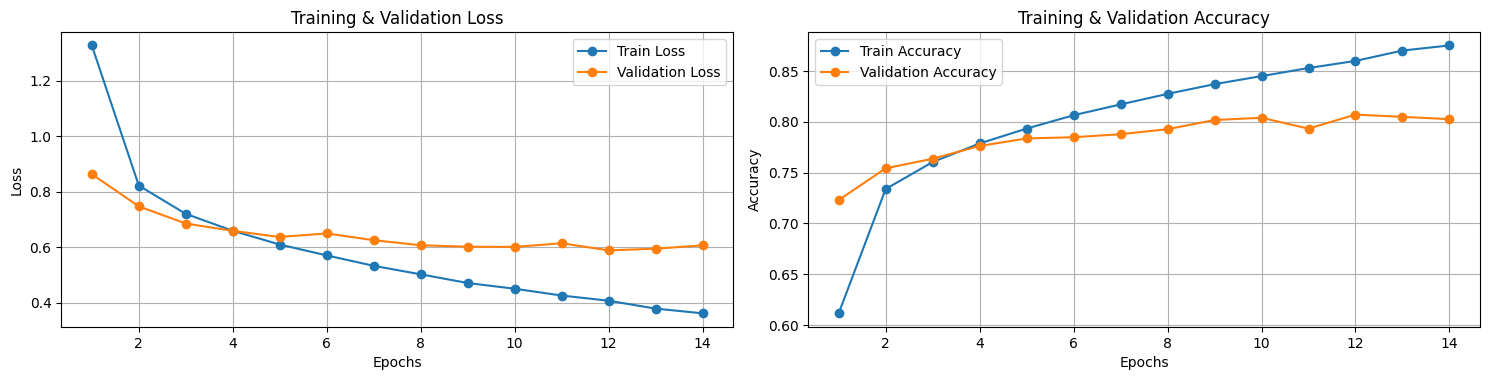

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
import numpy as np

# Î™®Îç∏ Ï§ÄÎπÑ
bert_model = BertModel.from_pretrained('skt/kobert-base-v1', return_dict=True)
model = BERTClassifier(bert_model, len(dataset.label_to_index))
model.to(device)

# ÏòµÌã∞ÎßàÏù¥Ï†Ä Î∞è Ïä§ÏºÄÏ§ÑÎü¨
optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)
scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=len(train_loader) * EPOCHS)
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
scaler = GradScaler()

# Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞ Ìï®Ïàò
def calculate_accuracy(logits, labels):
    preds = torch.argmax(logits, dim=1)
    correct = (preds == labels).sum().item()
    return correct / len(labels)

# Early Stopping ÏÑ§Ï†ï
best_val_loss = float('inf')
patience = 3  # ÏÑ±Îä• Ìñ•ÏÉÅÏù¥ ÏóÜÎäî epoch Ïàò
patience_counter = 0

# Î™®Îç∏ Ï†ÄÏû• Í≤ΩÎ°ú
best_model_path = "best_model.pth"

# ÌïôÏäµ Î∞è Í≤ÄÏ¶ù Í∏∞Î°ùÏùÑ Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

# ÌïôÏäµ Î∞è Í≤ÄÏ¶ù Î£®ÌîÑ
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    total_acc = 0

    for i, batch in enumerate(tqdm(train_loader, desc=f"Epoch {epoch + 1}/{EPOCHS} [Training]")):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()

        with autocast():
            logits = model(input_ids, attention_mask)
            loss = criterion(logits, labels) / GRAD_ACCUMULATION_STEPS

        scaler.scale(loss).backward()

        if (i + 1) % GRAD_ACCUMULATION_STEPS == 0 or (i + 1) == len(train_loader):
            scaler.step(optimizer)
            scaler.update()
            scheduler.step()
            optimizer.zero_grad()

        total_loss += loss.item() * GRAD_ACCUMULATION_STEPS
        total_acc += calculate_accuracy(logits, labels)

    avg_train_loss = total_loss / len(train_loader)
    avg_train_acc = total_acc / len(train_loader)

    # Í≤ÄÏ¶ù Î£®ÌîÑ
    model.eval()
    val_loss = 0
    val_acc = 0

    with torch.no_grad():
        for batch in tqdm(val_loader, desc=f"Epoch {epoch + 1}/{EPOCHS} [Validation]"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            with autocast():
                logits = model(input_ids, attention_mask)
                loss = criterion(logits, labels)

            val_loss += loss.item()
            val_acc += calculate_accuracy(logits, labels)

    avg_val_loss = val_loss / len(val_loader)
    avg_val_acc = val_acc / len(val_loader)

    # ÌïôÏäµ/Í≤ÄÏ¶ù ÏÜêÏã§ Î∞è Ï†ïÌôïÎèÑ Ï∂úÎ†•
    print(f"Epoch {epoch + 1}/{EPOCHS}")
    print(f"Train Loss: {avg_train_loss:.4f}, Train Accuracy: {avg_train_acc:.4f}")
    print(f"Val Loss: {avg_val_loss:.4f}, Val Accuracy: {avg_val_acc:.4f}")

    # Early Stopping Ï≤¥ÌÅ¨
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0  # ÏÑ±Îä• Ìñ•ÏÉÅ Ïãú Ïπ¥Ïö¥ÌÑ∞ Ï¥àÍ∏∞Ìôî
        torch.save(model.state_dict(), best_model_path)  # Í∞ÄÏû• Ï¢ãÏùÄ Î™®Îç∏ Ï†ÄÏû•
    else:
        patience_counter += 1

    if patience_counter >= patience:
        print(f"Early stopping at epoch {epoch + 1} due to no improvement in validation loss.")
        break

    # Î¶¨Ïä§Ìä∏Ïóê Í∞í Ï†ÄÏû•
    train_losses.append(avg_train_loss)
    train_accuracies.append(avg_train_acc)
    val_losses.append(avg_val_loss)
    val_accuracies.append(avg_val_acc)

# üîπ ÌïôÏäµÏù¥ ÎÅùÎÇú ÌõÑ, Í∞ÄÏû• Ïûò ÎÇòÏò® Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
model.load_state_dict(torch.load(best_model_path))

# üîπ ÌïôÏäµÏù¥ ÎÅùÎÇú ÌõÑ ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ÏóêÏÑú F1, Recall, ROC AUC Í≥ÑÏÇ∞
model.eval()
test_preds = []
test_labels = []

with torch.no_grad():
    for batch in tqdm(test_loader, desc="Testing"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        logits = model(input_ids, attention_mask)

        # ÏòàÏ∏°Í∞í Ï†ÄÏû•
        preds = torch.argmax(logits, dim=1)
        test_preds.extend(preds.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())

        # ÌôïÎ•†Í∞í Ï†ÄÏû• (softmax)
        probabilities = F.softmax(logits, dim=1)  # Í∞Å ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú ÌôïÎ•†
        test_probabilities.extend(probabilities.cpu().numpy())

# F1 Score, Recall, ROC AUC Í≥ÑÏÇ∞ (ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ÏóêÏÑú)
f1_micro = precision_recall_fscore_support(test_labels, test_preds, average="micro")[2]
f1_macro = precision_recall_fscore_support(test_labels, test_preds, average="macro")[2]

recall_micro = precision_recall_fscore_support(test_labels, test_preds, average="micro")[1]
recall_macro = precision_recall_fscore_support(test_labels, test_preds, average="macro")[1]

try:
    roc_auc = roc_auc_score(test_labels, test_probabilities, multi_class="ovr")
except ValueError:
    roc_auc = 0  # ÏòàÏô∏ Ï≤òÎ¶¨ (ROC AUC Í≥ÑÏÇ∞ Î∂àÍ∞ÄÌï† Í≤ΩÏö∞ 0ÏúºÎ°ú ÏÑ§Ï†ï)

# Accuracy Í≥ÑÏÇ∞
test_accuracy = calculate_accuracy(np.array(test_preds), np.array(test_labels))

# ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ ÏÑ±Îä• Ï∂úÎ†•
print(f"\nTest Set Performance:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1 Micro: {f1_micro:.4f}, F1 Macro: {f1_macro:.4f}")
print(f"Recall Micro: {recall_micro:.4f}, Recall Macro: {recall_macro:.4f}, ROC AUC: {roc_auc:.4f}")

# üîπ ÌïôÏäµÏù¥ ÎÅùÎÇú ÌõÑ Í≤∞Í≥º ÏãúÍ∞ÅÌôî
epochs_range = range(1, len(train_losses) + 1)

plt.figure(figsize=(15, 7))

# Loss Í∑∏ÎûòÌîÑ
plt.subplot(2, 2, 1)
plt.plot(epochs_range, train_losses, label="Train Loss", marker='o')
plt.plot(epochs_range, val_losses, label="Validation Loss", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.grid()

# Accuracy Í∑∏ÎûòÌîÑ
plt.subplot(2, 2, 2)
plt.plot(epochs_range, train_accuracies, label="Train Accuracy", marker='o')
plt.plot(epochs_range, val_accuracies, label="Validation Accuracy", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

Testing for Confusion Matrix: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 626/626 [00:15<00:00, 41.69it/s]


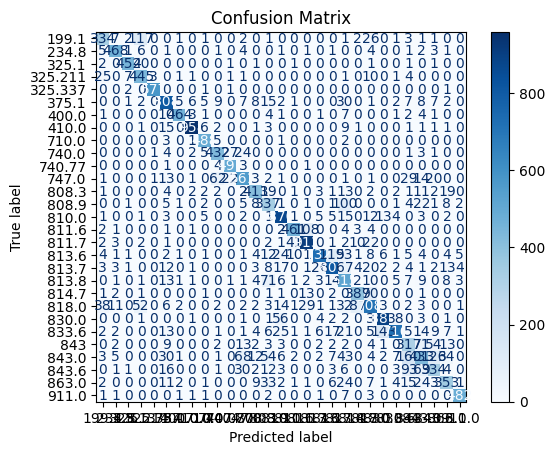

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Confusion Matrix Í≥ÑÏÇ∞ Î∞è ÏãúÍ∞ÅÌôî
all_labels = []
all_preds = []

model.eval()
with torch.no_grad():
    for batch in tqdm(test_loader, desc="Testing for Confusion Matrix"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        with autocast():
            logits = model(input_ids, attention_mask)

        preds = torch.argmax(logits, dim=1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

# Confusion Matrix ÏÉùÏÑ±
conf_matrix = confusion_matrix(all_labels, all_preds)

# ÌÅ¥ÎûòÏä§ Ïù¥Î¶Ñ (ÎùºÎ≤®) Ï∂îÏ∂ú
class_names = [key for key, _ in sorted(dataset.label_to_index.items(), key=lambda x: x[1])]

# Confusion Matrix ÏãúÍ∞ÅÌôî
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Confusion MatrixÏóêÏÑú Í∞ÄÏû• ÌÅ∞ Ïò§Ï∞®Î•º Í∞ÄÏßÑ ÌÅ¥ÎûòÏä§ Ïåç Ï∂îÏ∂ú
error_matrix = conf_matrix.copy()
np.fill_diagonal(error_matrix, 0)  # Ï†ïÌôïÌïú ÏòàÏ∏° Ï†úÍ±∞
top_misclassifications = np.unravel_index(np.argsort(error_matrix, axis=None)[-10:], error_matrix.shape)

# ÏÉÅÏúÑ ÌòºÎèô ÌÅ¥ÎûòÏä§ Ï∂úÎ†•
for true_class, pred_class in zip(*top_misclassifications):
    print(f"True: {class_names[true_class]}, Predicted: {class_names[pred_class]}, Count: {error_matrix[true_class, pred_class]}")

True: 818.0, Predicted: 814.7, Count: 87
True: 814.7, Predicted: 818.0, Count: 90
True: 843.6, Predicted: 843, Count: 93
True: 808.9, Predicted: 813.8, Count: 100
True: 811.6, Predicted: 811.7, Count: 108
True: 199.1, Predicted: 325.211, Count: 117
True: 813.6, Predicted: 813.7, Count: 119
True: 843.0, Predicted: 843.6, Count: 126
True: 833.6, Predicted: 830.0, Count: 143
True: 843.0, Predicted: 843, Count: 160


## 1000Í∞ú Ïù¥ÏÉÅ

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
import numpy as np

# Î™®Îç∏ Ï§ÄÎπÑ
bert_model = BertModel.from_pretrained('skt/kobert-base-v1', return_dict=True)
model = BERTClassifier(bert_model, len(dataset.label_to_index))
model.to(device)

# ÏòµÌã∞ÎßàÏù¥Ï†Ä Î∞è Ïä§ÏºÄÏ§ÑÎü¨
optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)
scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=len(train_loader) * EPOCHS)
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
scaler = GradScaler()

# Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞ Ìï®Ïàò
def calculate_accuracy(logits, labels):
    preds = torch.argmax(logits, dim=1)
    correct = (preds == labels).sum().item()
    return correct / len(labels)

# Early Stopping ÏÑ§Ï†ï
best_val_loss = float('inf')
patience = 3  # ÏÑ±Îä• Ìñ•ÏÉÅÏù¥ ÏóÜÎäî epoch Ïàò
patience_counter = 0

# Î™®Îç∏ Ï†ÄÏû• Í≤ΩÎ°ú
best_model_path = "best_model.pth"

# ÌïôÏäµ Î∞è Í≤ÄÏ¶ù Í∏∞Î°ùÏùÑ Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

# ÌïôÏäµ Î∞è Í≤ÄÏ¶ù Î£®ÌîÑ
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    total_acc = 0

    for i, batch in enumerate(tqdm(train_loader, desc=f"Epoch {epoch + 1}/{EPOCHS} [Training]")):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()

        with autocast():
            logits = model(input_ids, attention_mask)
            loss = criterion(logits, labels) / GRAD_ACCUMULATION_STEPS

        scaler.scale(loss).backward()

        if (i + 1) % GRAD_ACCUMULATION_STEPS == 0 or (i + 1) == len(train_loader):
            scaler.step(optimizer)
            scaler.update()
            scheduler.step()
            optimizer.zero_grad()

        total_loss += loss.item() * GRAD_ACCUMULATION_STEPS
        total_acc += calculate_accuracy(logits, labels)

    avg_train_loss = total_loss / len(train_loader)
    avg_train_acc = total_acc / len(train_loader)

    # Í≤ÄÏ¶ù Î£®ÌîÑ
    model.eval()
    val_loss = 0
    val_acc = 0

    with torch.no_grad():
        for batch in tqdm(val_loader, desc=f"Epoch {epoch + 1}/{EPOCHS} [Validation]"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            with autocast():
                logits = model(input_ids, attention_mask)
                loss = criterion(logits, labels)

            val_loss += loss.item()
            val_acc += calculate_accuracy(logits, labels)

    avg_val_loss = val_loss / len(val_loader)
    avg_val_acc = val_acc / len(val_loader)

    # ÌïôÏäµ/Í≤ÄÏ¶ù ÏÜêÏã§ Î∞è Ï†ïÌôïÎèÑ Ï∂úÎ†•
    print(f"Epoch {epoch + 1}/{EPOCHS}")
    print(f"Train Loss: {avg_train_loss:.4f}, Train Accuracy: {avg_train_acc:.4f}")
    print(f"Val Loss: {avg_val_loss:.4f}, Val Accuracy: {avg_val_acc:.4f}")

    # Early Stopping Ï≤¥ÌÅ¨
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0  # ÏÑ±Îä• Ìñ•ÏÉÅ Ïãú Ïπ¥Ïö¥ÌÑ∞ Ï¥àÍ∏∞Ìôî
        torch.save(model.state_dict(), best_model_path)  # Í∞ÄÏû• Ï¢ãÏùÄ Î™®Îç∏ Ï†ÄÏû•
    else:
        patience_counter += 1

    if patience_counter >= patience:
        print(f"Early stopping at epoch {epoch + 1} due to no improvement in validation loss.")
        break

    # Î¶¨Ïä§Ìä∏Ïóê Í∞í Ï†ÄÏû•
    train_losses.append(avg_train_loss)
    train_accuracies.append(avg_train_acc)
    val_losses.append(avg_val_loss)
    val_accuracies.append(avg_val_acc)

# üîπ ÌïôÏäµÏù¥ ÎÅùÎÇú ÌõÑ, Í∞ÄÏû• Ïûò ÎÇòÏò® Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
model.load_state_dict(torch.load(best_model_path))

# üîπ ÌïôÏäµÏù¥ ÎÅùÎÇú ÌõÑ ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ÏóêÏÑú F1, Recall, ROC AUC Í≥ÑÏÇ∞
model.eval()
test_preds = []
test_labels = []

with torch.no_grad():
    for batch in tqdm(test_loader, desc="Testing"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        logits = model(input_ids, attention_mask)

        # ÏòàÏ∏°Í∞í Ï†ÄÏû•
        preds = torch.argmax(logits, dim=1)
        test_preds.extend(preds.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())

        # ÌôïÎ•†Í∞í Ï†ÄÏû• (softmax)
        probabilities = F.softmax(logits, dim=1)  # Í∞Å ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú ÌôïÎ•†
        test_probabilities.extend(probabilities.cpu().numpy())

# F1 Score, Recall, ROC AUC Í≥ÑÏÇ∞ (ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ÏóêÏÑú)
f1_micro = precision_recall_fscore_support(test_labels, test_preds, average="micro")[2]
f1_macro = precision_recall_fscore_support(test_labels, test_preds, average="macro")[2]

recall_micro = precision_recall_fscore_support(test_labels, test_preds, average="micro")[1]
recall_macro = precision_recall_fscore_support(test_labels, test_preds, average="macro")[1]

try:
    roc_auc = roc_auc_score(test_labels, test_probabilities, multi_class="ovr")
except ValueError:
    roc_auc = 0  # ÏòàÏô∏ Ï≤òÎ¶¨ (ROC AUC Í≥ÑÏÇ∞ Î∂àÍ∞ÄÌï† Í≤ΩÏö∞ 0ÏúºÎ°ú ÏÑ§Ï†ï)

# Accuracy Í≥ÑÏÇ∞
test_accuracy = calculate_accuracy(np.array(test_preds), np.array(test_labels))

# ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ ÏÑ±Îä• Ï∂úÎ†•
print(f"\nTest Set Performance:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1 Micro: {f1_micro:.4f}, F1 Macro: {f1_macro:.4f}")
print(f"Recall Micro: {recall_micro:.4f}, Recall Macro: {recall_macro:.4f}, ROC AUC: {roc_auc:.4f}")

# üîπ ÌïôÏäµÏù¥ ÎÅùÎÇú ÌõÑ Í≤∞Í≥º ÏãúÍ∞ÅÌôî
epochs_range = range(1, len(train_losses) + 1)

plt.figure(figsize=(15, 7))

# Loss Í∑∏ÎûòÌîÑ
plt.subplot(2, 2, 1)
plt.plot(epochs_range, train_losses, label="Train Loss", marker='o')
plt.plot(epochs_range, val_losses, label="Validation Loss", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.grid()

# Accuracy Í∑∏ÎûòÌîÑ
plt.subplot(2, 2, 2)
plt.plot(epochs_range, train_accuracies, label="Train Accuracy", marker='o')
plt.plot(epochs_range, val_accuracies, label="Validation Accuracy", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

config.json:   0%|          | 0.00/535 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/369M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Epoch 1/40 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1415/1415 [03:11<00:00,  7.39it/s]


Epoch 1/40
Train Loss: 3.1544, Train Accuracy: 0.4286
Val Loss: 1.7286, Val Accuracy: 0.5808


Epoch 2/40 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1415/1415 [03:11<00:00,  7.40it/s]


Epoch 2/40
Train Loss: 1.4802, Train Accuracy: 0.5899
Val Loss: 1.2283, Val Accuracy: 0.5920


Epoch 3/40 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1415/1415 [03:11<00:00,  7.41it/s]


Epoch 3/40
Train Loss: 1.1236, Train Accuracy: 0.6218
Val Loss: 1.0831, Val Accuracy: 0.6320


Epoch 4/40 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1415/1415 [03:11<00:00,  7.38it/s]


Epoch 4/40
Train Loss: 0.9842, Train Accuracy: 0.6436
Val Loss: 0.9994, Val Accuracy: 0.6586


Epoch 5/40 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1415/1415 [03:11<00:00,  7.38it/s]


Epoch 5/40
Train Loss: 0.8961, Train Accuracy: 0.6618
Val Loss: 0.9680, Val Accuracy: 0.6740


Epoch 6/40 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1415/1415 [03:12<00:00,  7.36it/s]


Epoch 6/40
Train Loss: 0.8352, Train Accuracy: 0.6784
Val Loss: 0.9349, Val Accuracy: 0.6783


Epoch 7/40 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1415/1415 [03:12<00:00,  7.34it/s]


Epoch 7/40
Train Loss: 0.7810, Train Accuracy: 0.6909
Val Loss: 0.9149, Val Accuracy: 0.6714


Epoch 8/40 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1415/1415 [03:11<00:00,  7.40it/s]


Epoch 8/40
Train Loss: 0.7283, Train Accuracy: 0.7032
Val Loss: 0.8845, Val Accuracy: 0.6850


Epoch 9/40 [Training]:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 10293/11314 [1:05:58<06:29,  2.62it/s]